# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [476]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
print(os.listdir())

df = pd.read_parquet('./trip_records/2023-1.parquet')
df.info()

['HW_EDA_Assg_NYC_Taxi_Starter.ipynb', '.DS_Store', 'taxi_zones', 'nyc_taxi_sampled_2023.parquet', 'EDA_Assg_NYC_Taxi_Starter.ipynb', 'test.csv', 'data.csv', 'EDA_Assg_NYC_Taxi_Sai Prakash.ipynb', 'trip_records', 'csv', 'test.ipynb']
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amou

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('./trip_records')

# Create a list of all the twelve files to read
file_list  = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        file_df = pd.read_parquet(file_path)
        file_df['pickup_date']= file_df['tpep_pickup_datetime'].dt.date
        file_df['pickup_hour']= file_df['tpep_pickup_datetime'].dt.hour



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in file_df['pickup_date'].unique():
            # Iterate through each hour of the selected date
            date_df=file_df[file_df['pickup_date']==date]
            for hour in range(24):
                # Sample 5% of the hourly data randomly
                sample = date_df[date_df['pickup_hour']==hour].sample(frac=0.0075,random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df.to_parquet('../csv/parquet/2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [567]:
# Load the new data file
df = pd.read_parquet('../csv/parquet/2023.parquet')
original_df= df.copy()

In [568]:

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee  pickup_date  pickup_hour airport_fee  
1788             0.0   2023-12-01            0         NaN  
3196699          NaN   2023-12-01            0         NaN  
1408             0.0   2023-12-01            0         NaN  
3196663          NaN   2023-12-01            0         NaN  
3613             0.0   2023-12-01            0         NaN  

[5 rows x 22 columns]

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 1788 to 3206885
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [570]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [571]:
# Combine the two airport fee columns
print(df['Airport_fee'].value_counts())
print(df['airport_fee'].value_counts())
df['airport_fee']= df['airport_fee'].combine_first(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)
df['airport_fee'].value_counts()


Airport_fee
 0.00    230607
 1.75     18043
 1.25      4125
-1.75         2
Name: count, dtype: int64
airport_fee
0.00    20330
1.25     1958
Name: count, dtype: int64


airport_fee
 0.00    250937
 1.75     18043
 1.25      6083
-1.75         2
Name: count, dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [572]:
# check where values of fare amount are negative
negative_fares= df[df['fare_amount'] < 0]
print(negative_fares.shape) # No negative values


(0, 20)


Did you notice something different in the `RatecodeID` column for above records?

In [573]:
# Analyse RatecodeID for the negative fare amounts
negative_fares['RatecodeID']


Series([], Name: RatecodeID, dtype: float64)

In [574]:
# Find which columns have negative values
def get_negative_columns():
    negative_columns = []
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            # print(f"{col}: {df[df[col] < 0].shape[0]}")
            if df[df[col] < 0].shape[0] > 0:
                negative_columns.append(col)
    return negative_columns
print(get_negative_columns())

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [575]:
# fix these negative values
for col in get_negative_columns():
    print(col)
    #change negative columns to zero
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)


extra
mta_tax
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


In [576]:
get_negative_columns()

[]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [577]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum()
print(missing_values/len(df))


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033136
trip_distance            0.000000
RatecodeID               0.033136
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033136
pickup_date              0.000000
pickup_hour              0.000000
airport_fee              0.033136
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [578]:
# Display the rows with null values

for col in df.columns.to_list():
    print (col,df[col].isna().sum())

print('null values in passenger_count : ',df['passenger_count'].isna().sum())
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
print('null values in passenger_count : ',df['passenger_count'].isna().sum())





VendorID 0
tpep_pickup_datetime 0
tpep_dropoff_datetime 0
passenger_count 9427
trip_distance 0
RatecodeID 9427
PULocationID 0
DOLocationID 0
payment_type 0
fare_amount 0
extra 0
mta_tax 0
tip_amount 0
tolls_amount 0
improvement_surcharge 0
total_amount 0
congestion_surcharge 9427
pickup_date 0
pickup_hour 0
airport_fee 9427
null values in passenger_count :  9427
null values in passenger_count :  0


Did you find zeroes in passenger_count? Handle these.

In [579]:
print(df[df['passenger_count'] == 0].shape[0])
#Did you find zeroes in passenger_count? Handle these.
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)
print(df[df['passenger_count'] == 0].shape[0])

4375
0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [580]:
# Fix missing values in 'RatecodeID'
print('null values in RatecodeID : ',df['RatecodeID'].isnull().sum())
df['RatecodeID'].fillna(df['RatecodeID'].median(),inplace=True)
print('null values in RatecodeID: ',df['RatecodeID'].isnull().sum())


null values in RatecodeID :  9427
null values in RatecodeID:  0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [581]:
# handle null values in congestion_surcharge

print('null values in congestion_surcharge : ',df['congestion_surcharge'].isnull().sum())
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace=True)
print('null values in congestion_surcharge: ',df['congestion_surcharge'].isnull().sum())


null values in congestion_surcharge :  9427
null values in congestion_surcharge:  0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [582]:
# Handle any remaining missing values
def get_missing_values():
    return df.isnull().mean()

print(get_missing_values())
df['airport_fee'].fillna(df['airport_fee'].mode()[0], inplace=True)
print(get_missing_values())


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
pickup_date              0.000000
pickup_hour              0.000000
airport_fee              0.033136
dtype: float64
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra          

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [583]:
# Describe the data and check if there are any potential outliers present
df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  284492.000000                      284492                      284492   
mean        1.733349  2023-07-02 19:20:41.997792  2023-07-02 19:38:02.314908   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 15:36:21.500000  2023-04-02 15:53:39.500000   
50%         2.000000         2023-06-27 15:13:50  2023-06-27 15:29:38.500000   
75%         2.000000  2023-10-06 19:15:56.500000         2023-10-06 19:31:38   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447582                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    284492.000000  284492.000000  284492.000000  284492.000000   
mean          1.370766       3.569540       1.634281     165.252106   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.863288      46.959114       7.408107      64.049104   

        DOLocationID   payment_type    fare_amount          extra  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean      163.953180       1.165094      19.817924       1.587169   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.773988       0.506215      18.203902       1.823733   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  284492.000000  284492.000000  284492.000000          284492.000000   
mean        0.495351       3.544263       0.592555               0.999038   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048064       4.051388       2.175295               0.028606   

        total_amount  congestion_surcharge    pickup_hour    airport_fee  
count  284492.000000         284492.000000  284492.000000  284492.000000  
mean       28.873270              2.314758      14.264675       0.137716  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.800000              2.500000      19.000000       0.000000  
max       911.000000              2.500000      23.000000       1.750000  
std        22.759879              0.654823       5.807753       0.456808

VendorID
count    284492.000000
mean          1.733349
std           0.447582
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: VendorID, dtype: float64
-------------------------------------
value counts above 75% quantile
VendorID
6    68
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
VendorID
6        68
1     76132
2    208292
Name: count, dtype: int64
-------------------------------------


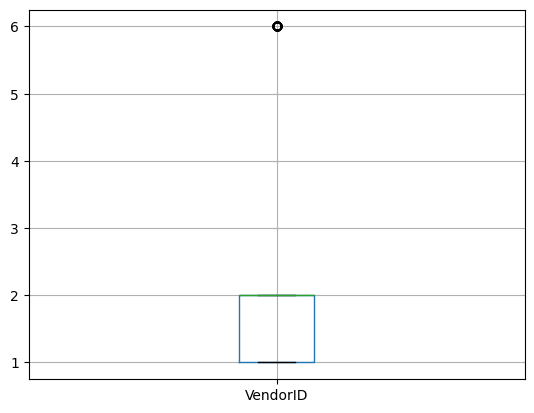

passenger_count
count    284492.000000
mean          1.370766
std           0.863288
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64
-------------------------------------
value counts above 75% quantile
passenger_count
9.0        1
7.0        2
8.0        2
6.0     2393
5.0     3547
4.0     5709
3.0    10386
2.0    41394
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
passenger_count
9.0         1
7.0         2
8.0         2
6.0      2393
5.0      3547
4.0      5709
3.0     10386
2.0     41394
1.0    221058
Name: count, dtype: int64
-------------------------------------


trip_distance
count    284492.000000
mean          3.569540
std          46.959114
min           0.000000
25%           1.050000
50%           1.800000
75%           3.400000
max       22528.820000
Name: trip_distance, dtype: float64
-------------------------------------
value counts above 75% quantile
trip_distance
23.37      1
37.12      1
23.07      1
23.56      1
36.52      1
        ... 
3.90     494
3.80     558
3.60     642
3.70     646
3.50     692
Name: count, Length: 2605, dtype: int64
-------------------------------------
value counts below 25% quantile
trip_distance
0.08      30
0.15      30
0.11      33
0.09      35
0.13      36
        ... 
0.70    3449
0.80    3817
0.90    3845
1.00    3876
0.00    5623
Name: count, Length: 105, dtype: int64
-------------------------------------
all value counts
trip_distance
23.37       1
36.27       1
22.45       1
55.27       1
22.93       1
         ... 
0.80     3817
1.10     3841
0.90     3845
1.00     3876
0.00     5623
Name: coun

RatecodeID
count    284492.000000
mean          1.634281
std           7.408107
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64
-------------------------------------
value counts above 75% quantile
RatecodeID
4.0       549
3.0       902
5.0      1541
99.0     1633
2.0     10799
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
RatecodeID
4.0        549
3.0        902
5.0       1541
99.0      1633
2.0      10799
1.0     269068
Name: count, dtype: int64
-------------------------------------


PULocationID
count    284492.000000
mean        165.252106
std          64.049104
min           1.000000
25%         132.000000
50%         162.000000
75%         234.000000
max         265.000000
Name: PULocationID, dtype: float64
-------------------------------------
value counts above 75% quantile
PULocationID
245        1
253        1
251        1
252        2
240        2
241        5
257        6
259        6
248        7
258        8
250        8
254       13
242       17
235       23
247       29
243       52
260       54
256       83
255      109
244      190
265      222
261     1494
264     2639
262     3765
246     4787
263     5466
238     5538
249     6366
239     7958
236    11944
237    13225
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
PULocationID
46        1
5         1
57        1
101       1
120       1
       ... 
43     4756
107    6010
79     6805
68     7470
48     7585
Name: count, Length: 117, dtype: int64
--

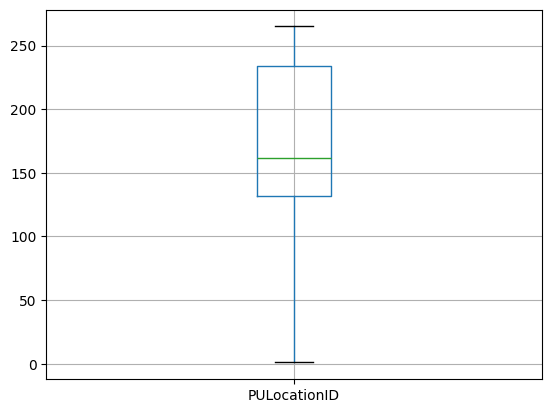

DOLocationID
count    284492.000000
mean        163.953180
std          69.773988
min           1.000000
25%         113.000000
50%         162.000000
75%         234.000000
max         265.000000
Name: DOLocationID, dtype: float64
-------------------------------------
value counts above 75% quantile
DOLocationID
251        3
245        6
253        6
240        7
248       29
250       31
259       33
242       34
241       46
258       53
254       53
252       56
235       61
247       94
257      121
260      232
243      478
256      657
255      745
244      841
265     1201
261     1323
264     2913
262     4376
249     4613
246     5441
263     5966
238     6422
239     7875
237    11851
236    12623
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
DOLocationID
57        1
59        1
99        1
30        3
111       3
       ... 
90     4049
107    5585
79     5882
48     7075
68     7281
Name: count, Length: 106, dtype: int64
--

payment_type
count    284492.000000
mean          1.165094
std           0.506215
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: payment_type, dtype: float64
-------------------------------------
value counts above 75% quantile
payment_type
3     1297
4     2040
2    47681
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
payment_type
0    9427
Name: count, dtype: int64
-------------------------------------
all value counts
payment_type
3      1297
4      2040
0      9427
2     47681
1    224047
Name: count, dtype: int64
-------------------------------------


fare_amount
count    284492.000000
mean         19.817924
std          18.203902
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         910.000000
Name: fare_amount, dtype: float64
-------------------------------------
value counts above 75% quantile
fare_amount
36.94        1
58.67        1
34.94        1
51.60        1
67.57        1
         ...  
24.70     2263
24.00     2510
23.30     2753
22.60     2796
70.00    10865
Name: count, Length: 2608, dtype: int64
-------------------------------------
value counts below 25% quantile
fare_amount
6.98        1
8.20        1
3.87        1
8.67        1
0.06        1
        ...  
5.80     8002
6.50    10079
7.20    11474
7.90    12226
8.60    12607
Name: count, Length: 198, dtype: int64
-------------------------------------
all value counts
fare_amount
49.73        1
47.11        1
14.46        1
85.80        1
32.05        1
         ...  
10.70    11712
7.90     12226
10.00    12509
9.30  

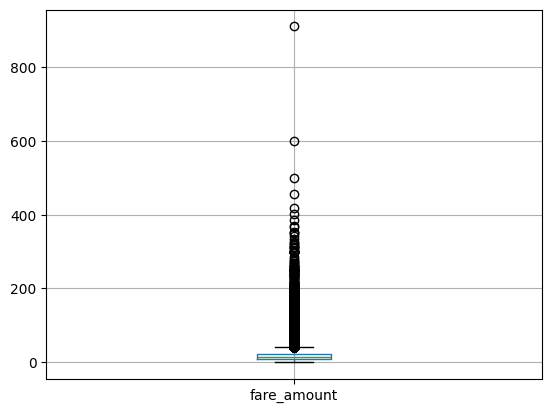

extra
count    284492.000000
mean          1.587169
std           1.823733
min           0.000000
25%           0.000000
50%           1.000000
75%           2.500000
max          14.250000
Name: extra, dtype: float64
-------------------------------------
value counts above 75% quantile
extra
2.72         1
12.50        1
4.05         1
14.25        1
6.80         1
4.75         2
3.25         2
3.00         2
5.25         4
3.20         9
7.25        60
8.50        61
11.25       64
10.00       76
9.75        82
6.25       133
11.75      170
7.75       211
10.25      236
8.75       318
2.75       327
6.75       348
3.75       403
4.25       935
9.25       947
7.50      2379
6.00      2439
3.50     16050
5.00     20201
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
extra
2.72          1
14.25         1
6.80          1
12.50         1
4.05        

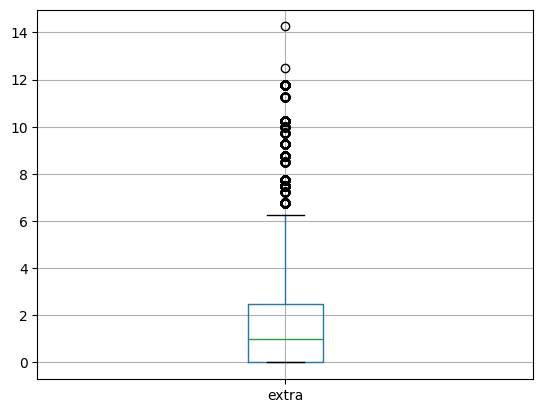

mta_tax
count    284492.000000
mean          0.495351
std           0.048064
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           0.800000
Name: mta_tax, dtype: float64
-------------------------------------
value counts above 75% quantile
mta_tax
0.8    9
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
mta_tax
0.05       4
0.00    2647
Name: count, dtype: int64
-------------------------------------
all value counts
mta_tax
0.05         4
0.80         9
0.00      2647
0.50    281832
Name: count, dtype: int64
-------------------------------------


tip_amount
count    284492.000000
mean          3.544263
std           4.051388
min           0.000000
25%           1.000000
50%           2.840000
75%           4.420000
max         150.290000
Name: tip_amount, dtype: float64
-------------------------------------
value counts above 75% quantile
tip_amount
21.69       1
36.71       1
29.75       1
22.04       1
26.87       1
         ... 
16.11    1005
4.62     1093
4.90     1190
10.00    2022
5.00     4310
Name: count, Length: 2181, dtype: int64
-------------------------------------
value counts below 25% quantile
tip_amount
0.27        1
0.21        1
0.62        1
0.19        1
0.35        1
        ...  
0.98       80
0.10      122
0.50      189
0.01      202
0.00    65385
Name: count, Length: 99, dtype: int64
-------------------------------------
all value counts
tip_amount
21.69        1
24.46        1
21.66        1
41.76        1
27.39        1
         ...  
5.00      4310
3.00      7367
1.00     11045
2.00     14200
0.00    

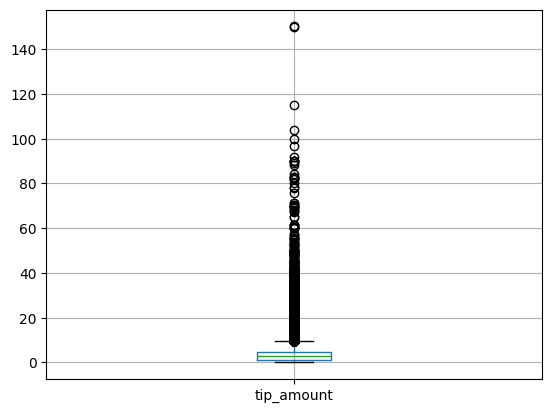

tolls_amount
count    284492.000000
mean          0.592555
std           2.175295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         143.000000
Name: tolls_amount, dtype: float64
-------------------------------------
value counts above 75% quantile
tolls_amount
12.44        1
21.90        1
37.68        1
25.55        1
5.80         1
         ...  
3.00       110
14.75      250
12.75      296
6.94      8383
6.55     12728
Name: count, Length: 287, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
tolls_amount
30.69         1
21.90         1
37.68         1
25.55         1
5.80          1
          ...  
14.75       250
12.75       296
6.94       8383
6.55      12728
0.00     261513
Name: count, Length: 288, dtype: int64
-------------------------------------


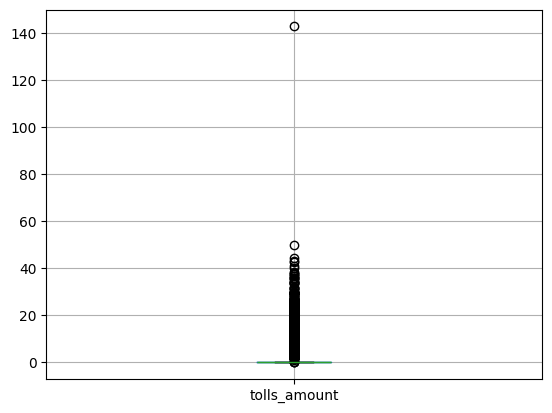

improvement_surcharge
count    284492.000000
mean          0.999038
std           0.028606
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: improvement_surcharge, dtype: float64
-------------------------------------
value counts above 75% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
value counts below 25% quantile
improvement_surcharge
0.0    138
0.3    194
Name: count, dtype: int64
-------------------------------------
all value counts
improvement_surcharge
0.0       138
0.3       194
1.0    284160
Name: count, dtype: int64
-------------------------------------


total_amount
count    284492.000000
mean         28.873270
std          22.759879
min           0.000000
25%          15.960000
50%          21.000000
75%          30.800000
max         911.000000
Name: total_amount, dtype: float64
-------------------------------------
value counts above 75% quantile
total_amount
64.51      1
92.24      1
99.02      1
76.33      1
48.32      1
        ... 
31.92    483
98.88    485
32.76    535
31.08    554
33.60    701
Name: count, Length: 7080, dtype: int64
-------------------------------------
value counts below 25% quantile
total_amount
8.62        1
15.06       1
13.96       1
12.94       1
15.67       1
         ... 
13.44    1909
14.28    1984
14.00    1994
15.12    2208
12.60    3606
Name: count, Length: 693, dtype: int64
-------------------------------------
all value counts
total_amount
64.51       1
11.33       1
44.14       1
41.37       1
92.76       1
         ... 
15.12    2208
15.96    2228
21.00    3414
12.60    3606
16.80    4081
Name

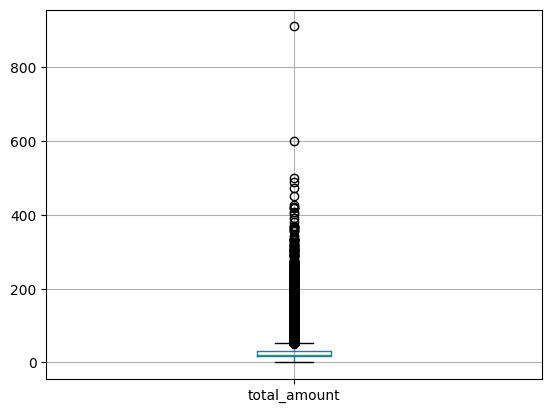

congestion_surcharge
count    284492.000000
mean          2.314758
std           0.654823
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64
-------------------------------------
value counts above 75% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
value counts below 25% quantile
congestion_surcharge
0.0    21080
Name: count, dtype: int64
-------------------------------------
all value counts
congestion_surcharge
0.0     21080
2.5    263412
Name: count, dtype: int64
-------------------------------------


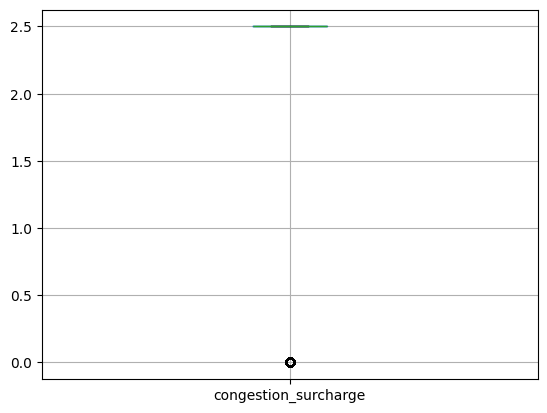

airport_fee
count    284492.000000
mean          0.137716
std           0.456808
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: airport_fee, dtype: float64
-------------------------------------
value counts above 75% quantile
airport_fee
1.25     6083
1.75    18043
Name: count, dtype: int64
-------------------------------------
value counts below 25% quantile
Series([], Name: count, dtype: int64)
-------------------------------------
all value counts
airport_fee
1.25      6083
1.75     18043
0.00    260366
Name: count, dtype: int64
-------------------------------------


In [584]:
# Check for potential out of place values in various columns
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        print(df[col].describe())
        print('-------------------------------------')
        #find count of values above 75% quantile
        print('value counts above 75% quantile')
        print(df[df[col] > df[col].quantile(0.75)][col].value_counts().sort_values())
        print('-------------------------------------')
        #find count of values below 25% quantile
        print('value counts below 25% quantile')
        print(df[df[col] < df[col].quantile(0.25)][col].value_counts().sort_values())
        print('-------------------------------------')
       
        print('all value counts')

        print(df[col].value_counts().sort_values())
        print('-------------------------------------')
        df.boxplot(column=col)
        plt.show()
      
        print('================================================')
        
      

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [585]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df['passenger_count'].value_counts()

passenger_count
1.0    221058
2.0     41394
3.0     10386
4.0      5709
5.0      3547
6.0      2393
Name: count, dtype: int64

In [586]:
# Continue with outlier handling

# Remove rows where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Remove rows where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Remove rows where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# Remove rows where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove  rows where VendorID id 6
df = df[df['VendorID']!= 6] 
# remove Tip amount > 30
df=df[df['tip_amount']<30]
# Verify the changes
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  274710.000000                      274710                      274710   
mean        1.736497  2023-07-01 20:16:33.908514  2023-07-01 20:33:48.347064   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-01 20:07:49.750000  2023-04-01 20:23:15.250000   
50%         2.000000         2023-06-26 02:34:32         2023-06-26 02:50:42   
75%         2.000000  2023-10-05 18:44:40.500000  2023-10-05 19:04:08.250000   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.440534                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    274710.000000  274710.000000  274710.000000  274710.000000   
mean          1.383219       3.420248       1.653962     165.432744   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.360000       1.000000     234.000000   
max           6.000000     187.350000      99.000000     265.000000   
std           0.874736       4.470311       7.535236      63.753778   

        DOLocationID   payment_type    fare_amount          extra  \
count  274710.000000  274710.000000  274710.000000  274710.000000   
mean      164.217713       1.205235      19.603513       1.636255   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     455.200000      14.250000   
std        69.667125       0.465899      17.659107       1.830176   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  274710.000000  274710.000000  274710.000000          274710.000000   
mean        0.495679       3.524302       0.582499               0.999315   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000      29.950000     143.000000               1.000000   
std         0.046363       3.780271       2.128711               0.024295   

        total_amount  congestion_surcharge    pickup_hour    airport_fee  
count  274710.000000         274710.000000  274710.000000  274710.000000  
mean       28.664650              2.310355      14.299068       0.141830  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.600000              2.500000      19.000000       0.000000  
max       488.700000              2.500000      23.000000       1.750000  
std        22.078467              0.661929       5.775152       0.462966

In [587]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = df.copy()
scaled_df[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']] = scaler.fit_transform(df[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']])
scaled_df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  274710.000000                      274710                      274710   
mean        1.736497  2023-07-01 20:16:33.908514  2023-07-01 20:33:48.347064   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-01 20:07:49.750000  2023-04-01 20:23:15.250000   
50%         2.000000         2023-06-26 02:34:32         2023-06-26 02:50:42   
75%         2.000000  2023-10-05 18:44:40.500000  2023-10-05 19:04:08.250000   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.440534                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    274710.000000   2.747100e+05  274710.000000  274710.000000   
mean          1.383219  -1.063577e-16       1.653962     165.432744   
min           1.000000  -7.651042e-01       1.000000       1.000000   
25%           1.000000  -5.279838e-01       1.000000     132.000000   
50%           1.000000  -3.646839e-01       1.000000     162.000000   
75%           1.000000  -1.347728e-02       1.000000     234.000000   
max           6.000000   4.114481e+01      99.000000     265.000000   
std           0.874736   1.000002e+00       7.535236      63.753778   

        DOLocationID   payment_type   fare_amount         extra       mta_tax  \
count  274710.000000  274710.000000  2.747100e+05  2.747100e+05  2.747100e+05   
mean      164.217713       1.205235 -2.687911e-16 -1.266360e-16 -2.163986e-15   
min         1.000000       1.000000 -1.110110e+00 -8.940444e-01 -1.069132e+01   
25%       114.000000       1.000000 -5.834684e-01 -8.940444e-01  9.320597e-02   
50%       162.000000       1.000000 -3.456304e-01 -3.476478e-01  9.320597e-02   
75%       234.000000       1.000000  1.300457e-01  4.719471e-01  9.320597e-02   
max       265.000000       4.000000  2.466700e+01  6.892107e+00  6.563919e+00   
std        69.667125       0.465899  1.000002e+00  1.000002e+00  1.000002e+00   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.747100e+05  2.747100e+05           2.747100e+05  2.747100e+05   
mean  -1.687445e-16 -4.655735e-17           1.485107e-14  1.146345e-16   
min   -9.322899e-01 -2.736399e-01          -4.113325e+01 -1.298310e+00   
25%   -6.677581e-01 -2.736399e-01           2.818415e-02 -5.754327e-01   
50%   -1.757289e-01 -2.736399e-01           2.818415e-02 -3.471556e-01   
75%    2.369407e-01 -2.736399e-01           2.818415e-02  8.765797e-02   
max    6.990438e+00  6.690328e+01           2.818415e-02  2.083642e+01   
std    1.000002e+00  1.000002e+00           1.000002e+00  1.000002e+00   

       congestion_surcharge    pickup_hour    airport_fee  
count         274710.000000  274710.000000  274710.000000  
mean               2.310355      14.299068       0.141830  
min                0.000000       0.000000       0.000000  
25%                2.500000      11.000000       0.000000  
50%                2.500000      15.000000       0.000000  
75%                2.500000      19.000000       0.000000  
max                2.500000      23.000000       1.750000  
std                0.661929       5.775152       0.462966

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [588]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

`All of the above are  numerical`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

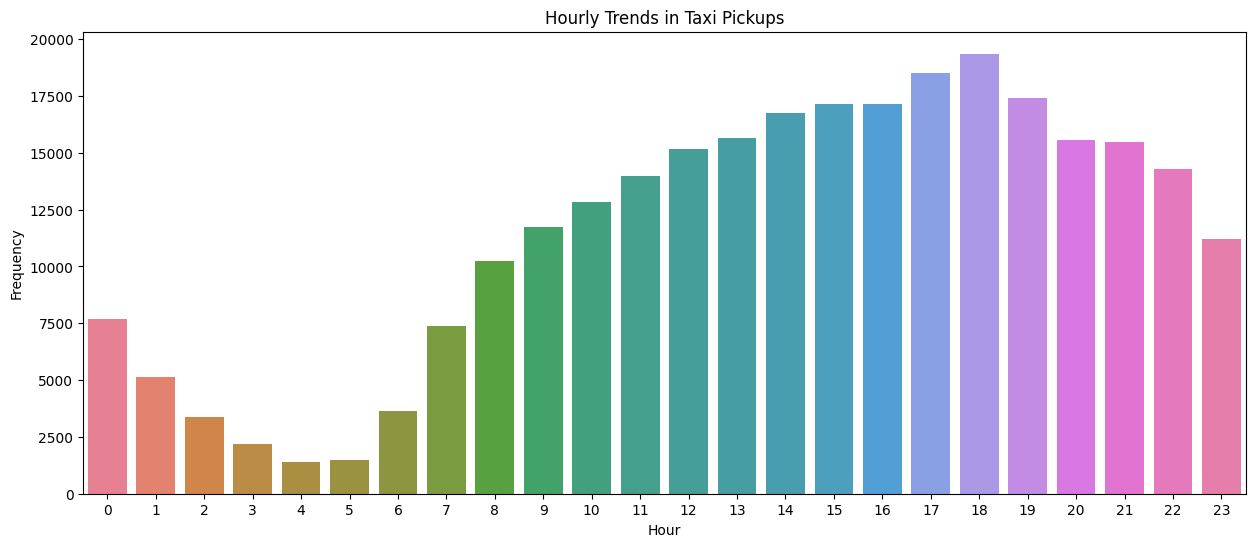

In [589]:
# Find and show the hourly trends in taxi pickups
# Create a new column for the day of the week 
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['day_of_week'].value_counts()    # Check the distribution of the days of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_hour'].value_counts()    # Check the distribution of the hours of the day
# Plot the hourly trends in taxi pickups   
# Put hours on one axis and their value count on another and show the trend
plt.figure(figsize=(15, 6))
sns.countplot(x='pickup_hour', data=df,palette='husl')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()  


In [590]:
# Find and show the daily trends in taxi pickups (days of the week)
# Find and show the daily trends in taxi pickups (days of the week)
# Plot the daily trends in taxi pickups
plt.figure(figsize=(15, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette='husl')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()


In [591]:
# Show the monthly trends in pickups
# Create a new column for the month
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['month'].value_counts()    # Check the distribution of the months
# Plot the monthly trends in taxi pickups  
plt.figure(figsize=(15, 6))
sns.countplot(x='month', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],palette='rocket')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [592]:
# Analyse the above parameters
# Check the distribution of the trip distance USING VALUE_COUNTS    
columns =[ 'fare_amount', 'trip_distance', 'total_amount', 'tip_amount']
for col in columns:
    print(df[col].value_counts())
    print('-------------------------------------')
    print('zero and negative values in',col, df[df[col]<=0].shape[0])




fare_amount
8.6      12511
9.3      12464
10.0     12422
7.9      12152
10.7     11641
         ...  
29.4         1
204.6        1
37.8         1
225.0        1
145.1        1
Name: count, Length: 822, dtype: int64
-------------------------------------
zero and negative values in fare_amount 85
trip_distance
1.00     3800
0.90     3778
1.10     3759
0.80     3739
1.20     3612
         ... 
30.05       1
43.32       1
27.23       1
24.61       1
34.00       1
Name: count, Length: 2842, dtype: int64
-------------------------------------
zero and negative values in trip_distance 3349
total_amount
16.80    4069
12.60    3596
21.00    3399
15.96    2206
15.12    2191
         ... 
88.36       1
82.09       1
48.59       1
39.51       1
46.51       1
Name: count, Length: 7774, dtype: int64
-------------------------------------
zero and negative values in total_amount 41
tip_amount
0.00     61556
2.00     13938
1.00     10929
3.00      7246
5.00      4261
         ...  
22.42        1
21.97

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [593]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0) & (df['total_amount'] > 0) & (df['tip_amount'] > 0)]
df_non_zero.shape



(211926, 22)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [594]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby('month')['total_amount'].sum()

print(monthly_revenue.sort_values(ascending=False))
# Plot the monthly revenue
plt.figure(figsize=(15, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values,order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],palette='rocket')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()  



month
October      593035.79
May          587043.52
November     552771.07
March        551499.51
June         550115.83
December     533011.02
April        529669.81
January      483964.77
September    472217.28
February     460656.48
July         456828.24
August       446286.55
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    0.238061
2    0.268025
3    0.226504
4    0.267410
Name: total_amount, dtype: float64


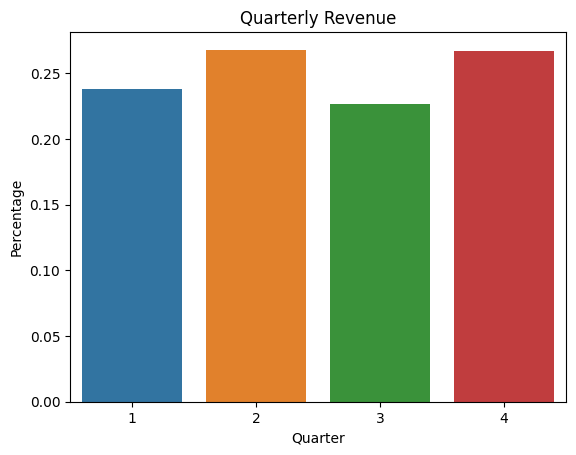

In [595]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
quarterly_revenue = quarterly_revenue / quarterly_revenue.sum() 
print(quarterly_revenue)
# Plot the quarterly revenue
plt.figure(figsize=(15, 6))
# DRAW A PIE CHART
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct='%1.1f%%',counterclock=True)
plt.title('Quarterly Revenue')
plt.show()
sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, palette='tab10')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

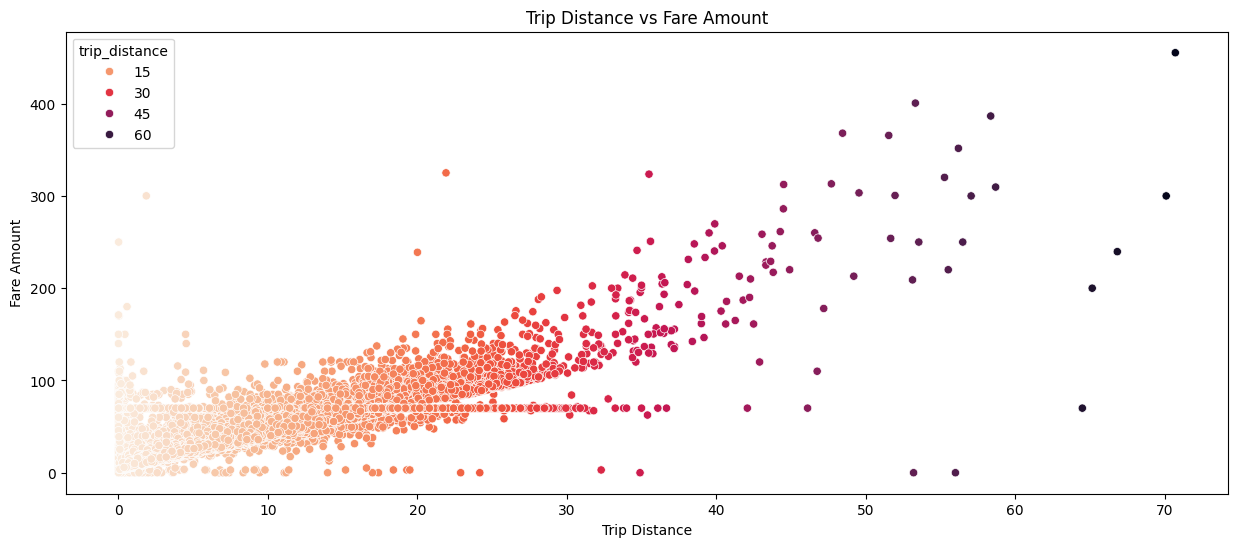

In [596]:
# Show how trip fare is affected by distance

# Plot a scatter plot of trip distance vs fare amount
plt.figure(figsize=(15, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[(df['trip_distance']>0) & (df['trip_distance'] < 75)],hue='trip_distance',palette='rocket_r')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [597]:
df[['fare_amount','trip_distance']].corr()

fare_amount  trip_distance
fare_amount       1.000000       0.913015
trip_distance     0.913015       1.000000

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

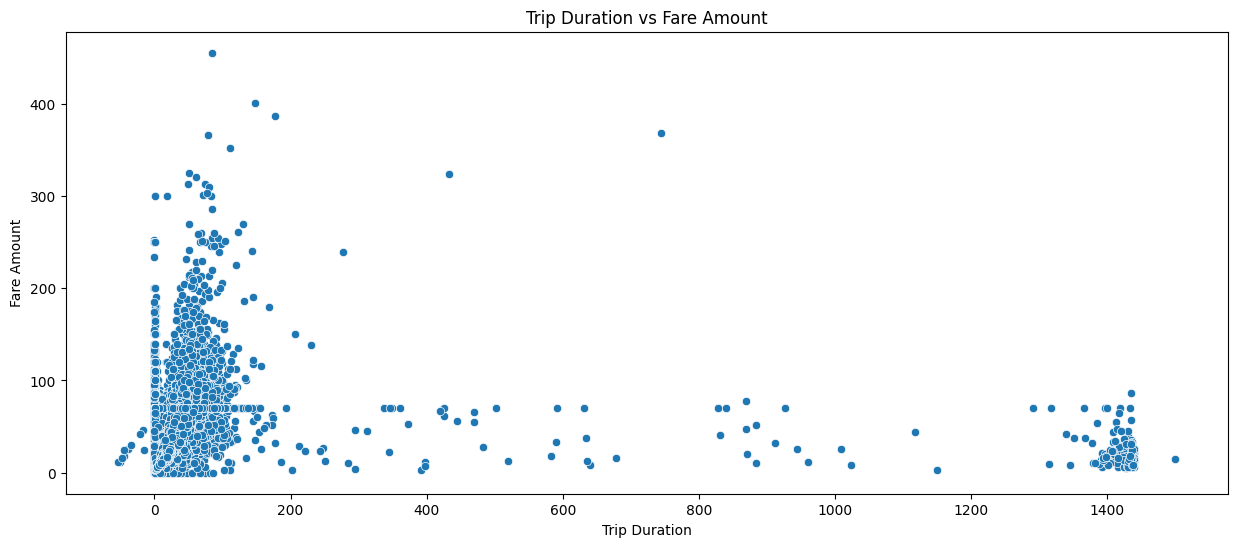

fare_amount  trip_duration
fare_amount           1.00           0.27
trip_duration         0.27           1.00

In [645]:
# Show relationship between fare and trip duration
# Create a new column for trip duration
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60
# Plot a scatter plot of trip duration vs fare amount
plt.figure(figsize=(15, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df[df['trip_duration']<1600])
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()
df[['fare_amount','trip_duration']].corr()


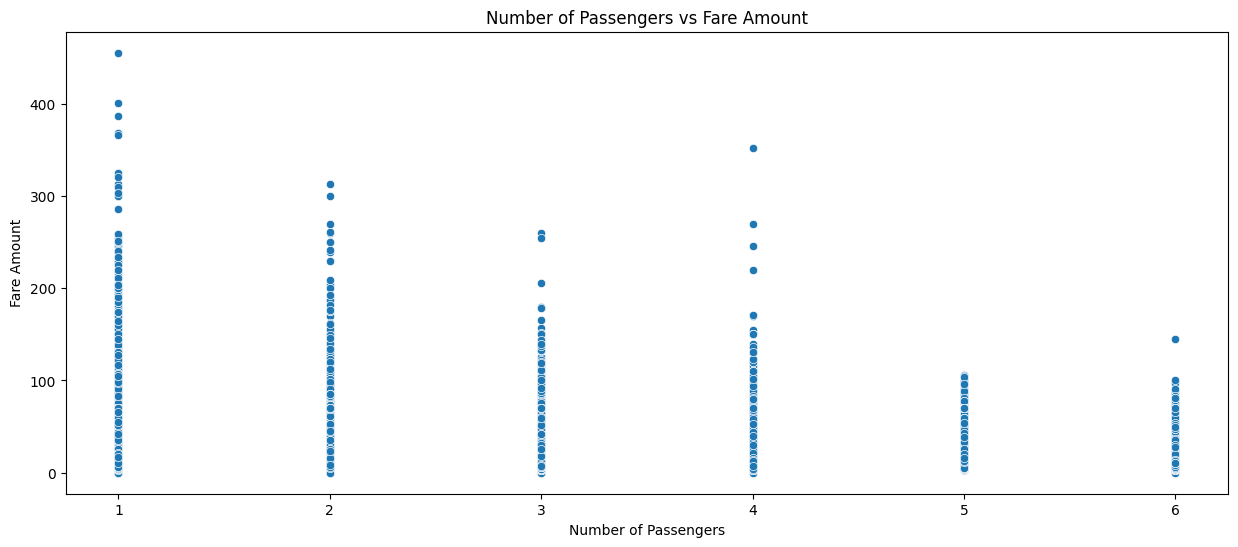

fare_amount  passenger_count
fare_amount             1.00             0.04
passenger_count         0.04             1.00

In [646]:
# Show relationship between fare and number of passengers
# Plot a scatter plot of number of passengers vs fare amount
plt.figure(figsize=(15, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Number of Passengers vs Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')   
plt.show()
df[['fare_amount','passenger_count']].corr()

0.5828321758855283


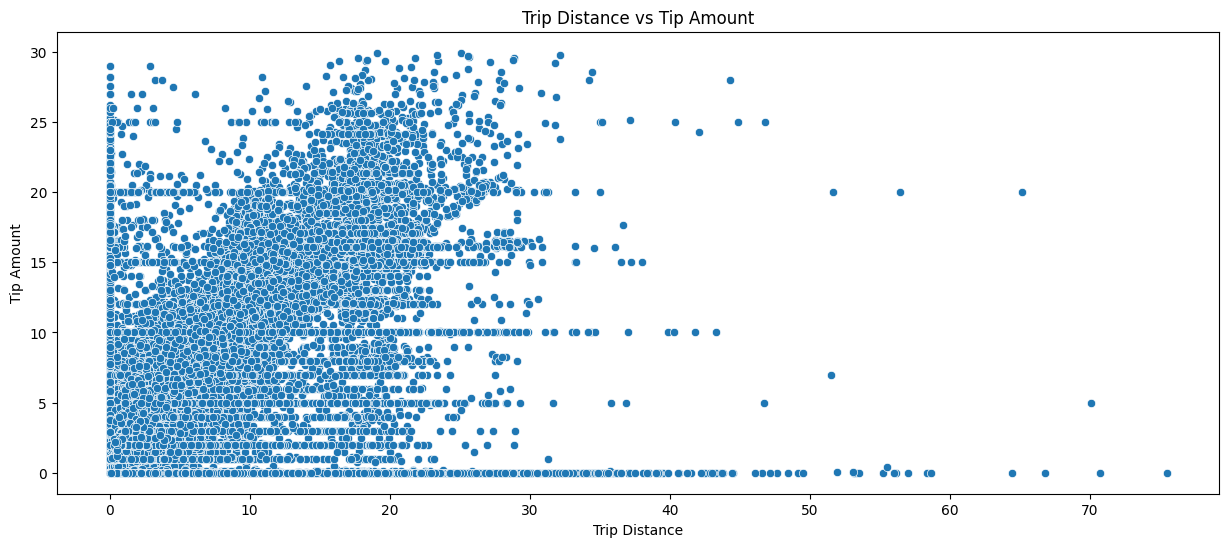

In [600]:
# Show relationship between tip and trip distance
# Plot a scatter plot of trip distance vs tip amount
print(df['trip_distance'].corr(df['tip_amount']))
plt.figure(figsize=(15, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df[df['trip_distance']<100])
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    223702
2     47674
4      2038
3      1296
Name: count, dtype: int64


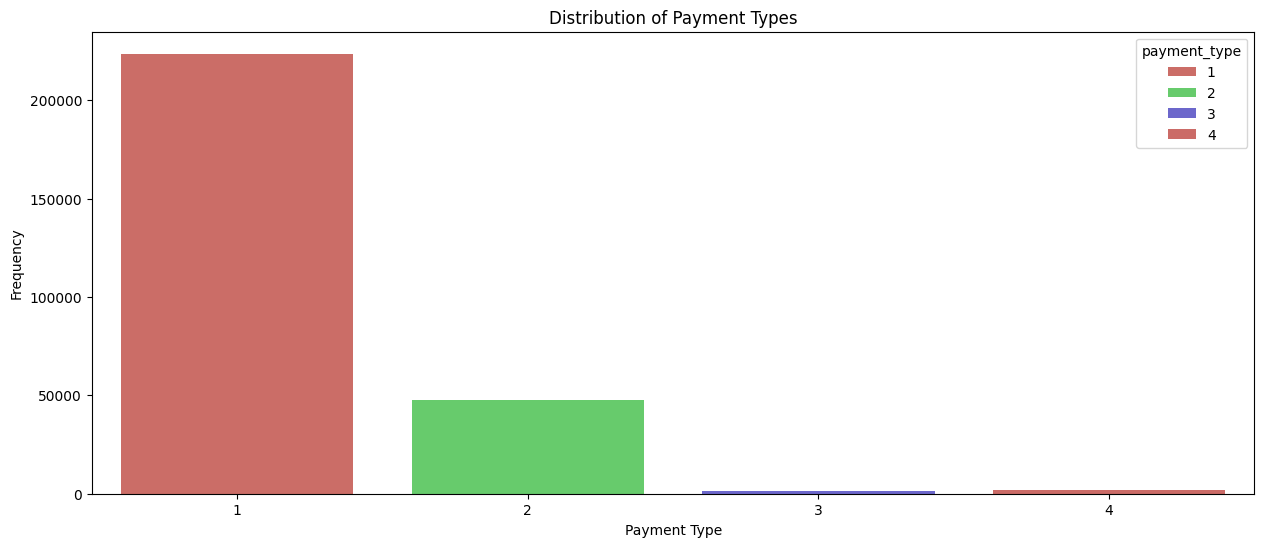

In [601]:
# Analyse the distribution of different payment types (payment_type).
print(df['payment_type'].value_counts())
# Plot the distribution of different payment types
plt.figure(figsize=(15, 6))
sns.countplot(x='payment_type', data=df,orient='v', palette='hls',hue='payment_type')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')

plt.ylabel('Frequency')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [602]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [603]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


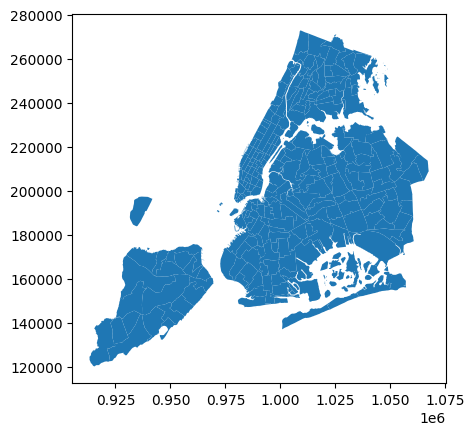

In [604]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [605]:
# Merge zones and trip records using locationID and PULocationID

full_df_with_zone= df.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')
full_df_with_zone.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee',
       'day_of_week', 'month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [606]:
# Group data by location and calculate the number of trips
location_trips_pickup = full_df_with_zone.groupby('LocationID')['PULocationID'].count()
print(location_trips_pickup.sort_values(ascending=False))



LocationID
132    14412
237    12995
161    12862
236    11635
162     9978
       ...  
154        1
251        1
46         1
118        1
214        1
Name: PULocationID, Length: 238, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [607]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_trips_pickup, left_on='LocationID', right_on='LocationID', how='left')
zones.rename(columns={'PULocationID': 'trip_count'}, inplace=True)
zones.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        35.0  
1         NaN  
2        10.0  
3       269.0  
4         1.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

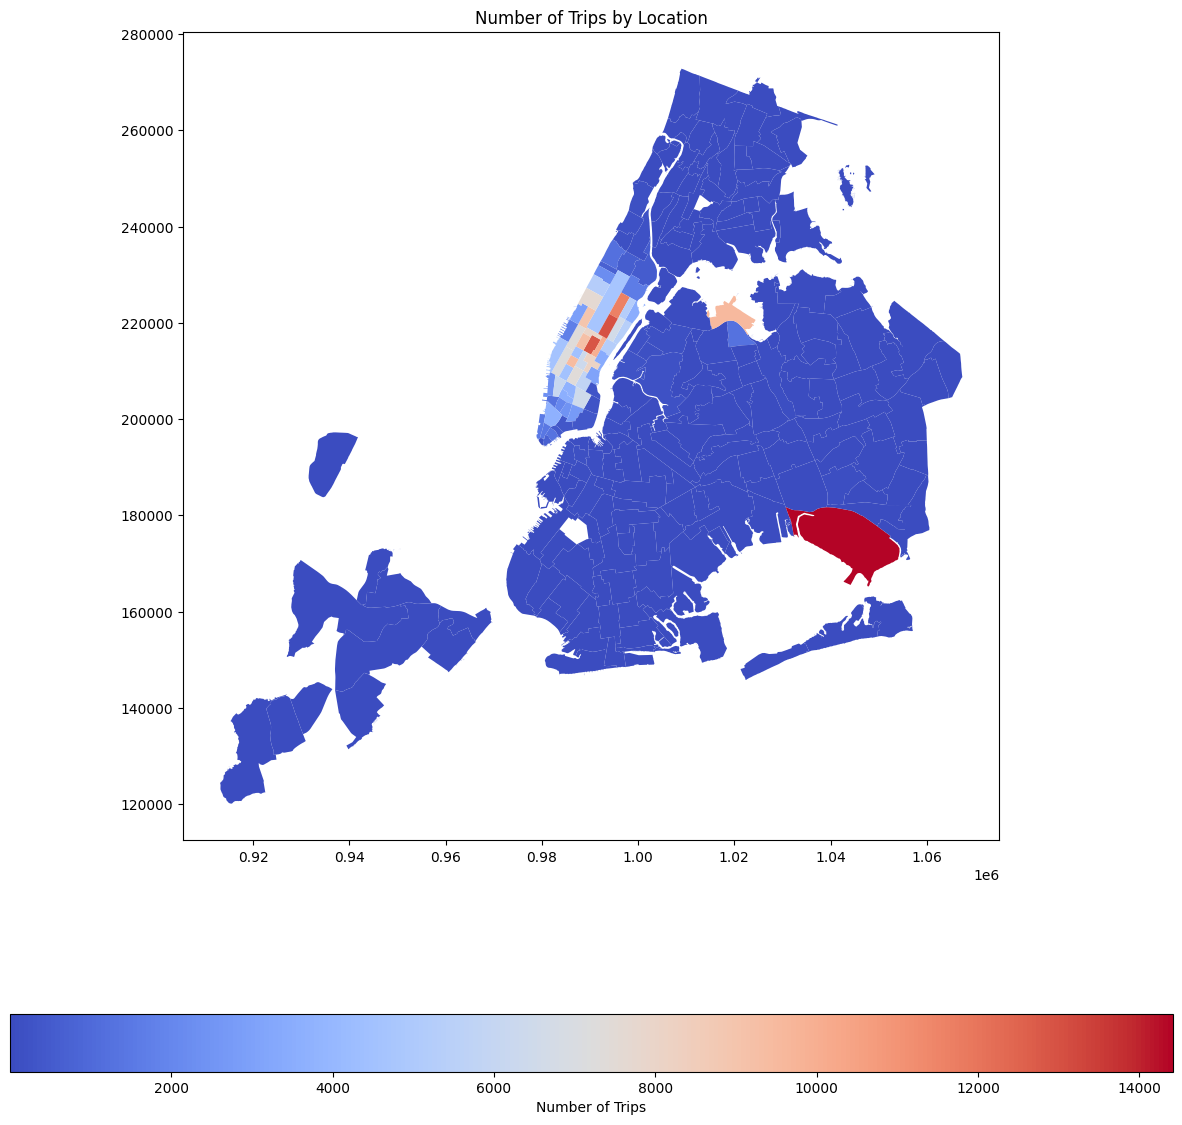

In [608]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Number of Trips by Location')

plt.show()

In [609]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones[zones['trip_count']>0].sort_values(by='trip_count', ascending=False)
sorted_zones.nlargest(20,'trip_count')

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   
233       234    0.036072    0.000073                      Union Sq   
47         48    0.043747    0.000094                  Clinton East   
67         68    0.049337    0.000111                  East Chelsea   
140       141    0.041514    0.000077               Lenox Hill West   
78         79    0.042625    0.000108                  East Village   
163       164    0.035772    0.000056                 Midtown South   
248       249    0.036384    0.000072                  West Village   
106       107    0.038041    0.000075                      Gramercy   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
233         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
47           48  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
140         141  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
163         164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
248         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   
106         107  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...   

     trip_count  
131     14412.0  
236     12995.0  
160     12862.0  
235     11635.0  
161      9978.0  
137      9536.0  
185      9404.0  
229      9216.0  
141      8997.0  
169      8113.0  
162      7945.0  
238      7630.0  
233      7402.0  
47       7355.0  
67       7246.0  
140      6591.0  
78       6454.0  
163      6379.0  
248      6125.0  
106      5808.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


- Busiest hours are 3-7 PM, with a peak from 5-7 PM.
- Busiest days are Wednesday and Thursday.
- Busiest months are May and October.
- Revenue is highest in October, followed by May and March. Quarterly revenue is fairly even.
- Fare positively correlates with trip distance and duration. Passenger count has little effect.
- Tip dependence is weakly correlated with trip distance.
- Busiest zones are around major transportation hubs and commercial areas in Manhattan.
- Credit cards are the most used payment method.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [610]:
# Find routes which have the slowest speeds at different times of the day
routes_df =df[(df['trip_duration']>0) & (df['trip_distance']>0)]
print(routes_df.head())
# Create a new column for speed
routes_df['speed'] = routes_df['trip_distance'] / (routes_df['trip_duration'] / 60)
# Group data by pickup and drop off location and calculate the average speed
slowest_routes = routes_df.groupby(['PULocationID', 'DOLocationID','pickup_hour'])['speed'].mean()
print(slowest_routes.sort_values())
slowest_routes = slowest_routes.reset_index()
print(slowest_routes.groupby('pickup_hour').apply(lambda x: x.nsmallest(5, 'speed')))



   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
5         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
2           1.05         1.0           161           161             1   
4           0.40         1.0            68            68             1   
5           1.66         1.0           114           186             1   
6           2.45         1.0           164           232             1   

   fare_amount  ...  improvement_surcharge  total_amount  \
0         23.3  ...                    1.0  

How does identifying high-traffic, high-demand routes help us?

Knowing the most popular routes and areas with high demand for taxis allows us to:
- Optimize resource allocation by strategically positioning taxis in high-demand areas.
- Enhance route planning by avoiding congested areas and taking the most efficient routes.
- Increase customer satisfaction by deploying additional resources during peak hours and days of the week to reduce wait times.
- Drive revenue growth by informing targeted marketing campaigns that attract customers during off-peak times.
- Overall, identifying high-traffic, high-demand routes is crucial for optimizing taxi services, improving customer experience, and increasing revenue.


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

pickup_hour
18    19359
17    18530
19    17395
15    17163
16    17127
14    16744
13    15641
20    15562
21    15470
12    15151
22    14285
11    13971
10    12846
9     11729
23    11227
8     10236
0      7684
7      7369
1      5126
6      3626
2      3374
3      2192
5      1490
4      1413
Name: tpep_pickup_datetime, dtype: int64


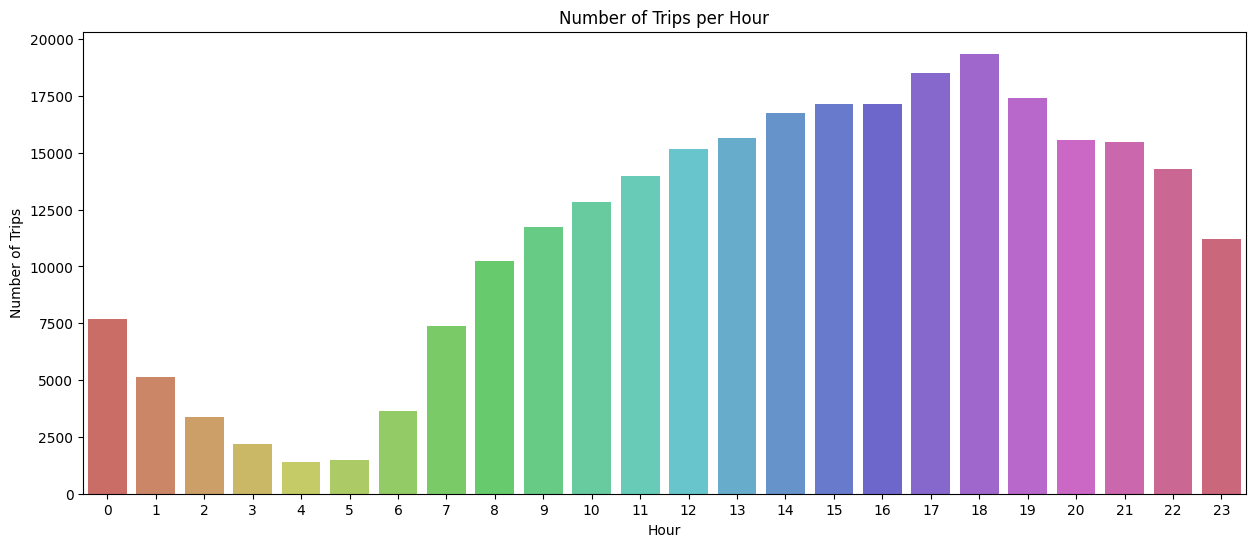

The busiest hour is 18 with 19359 trips


In [615]:
# Visualise the number of trips per hour and find the busiest hour
# Group data by hour and calculate the number of trips
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count()
print(hourly_trips.sort_values(ascending=False))
# Plot the number of trips per hour
plt.figure(figsize=(15, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette='hls')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()
# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
print(f"The busiest hour is {busiest_hour} with {hourly_trips.max()} trips")    


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

pickup_hour
18   2581200.00
17   2470666.67
19   2319333.33
15   2288400.00
16   2283600.00
14   2232533.33
13   2085466.67
20   2074933.33
21   2062666.67
12   2020133.33
22   1904666.67
11   1862800.00
10   1712800.00
9    1563866.67
23   1496933.33
8    1364800.00
0    1024533.33
7     982533.33
1     683466.67
6     483466.67
2     449866.67
3     292266.67
5     198666.67
4     188400.00
Name: tpep_pickup_datetime, dtype: float64


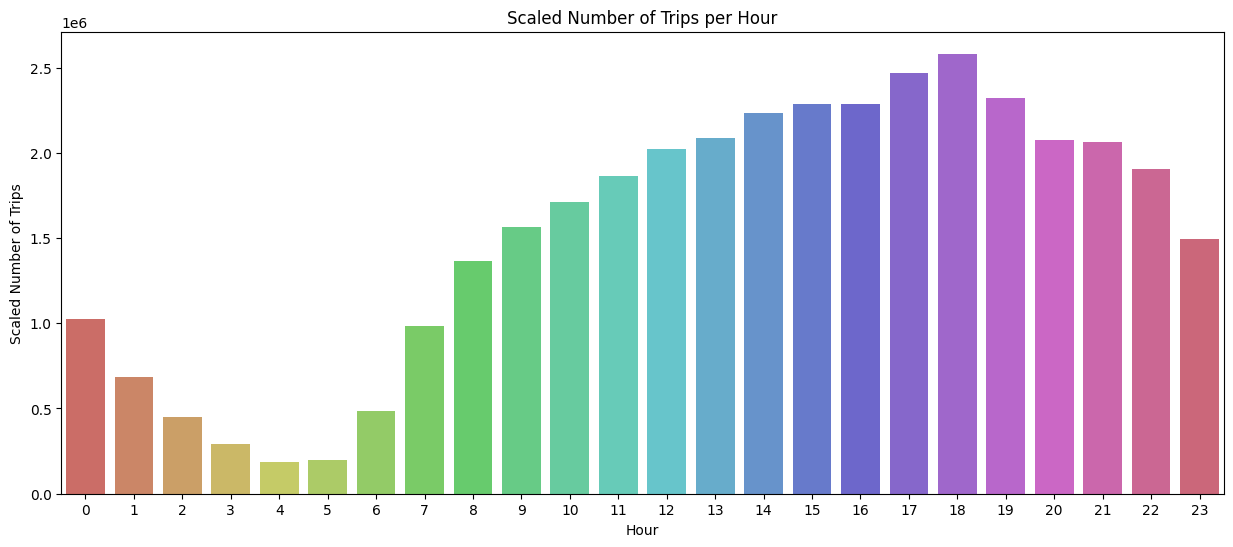

pickup_hour
18   2581200.00
17   2470666.67
19   2319333.33
15   2288400.00
16   2283600.00
Name: tpep_pickup_datetime, dtype: float64

In [ ]:
# Scale up the number of trips based on the sampling fraction= 0.0075
pd.set_option('display.float_format', '{:.2f}'.format)
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075
scaled_hourly_trips = hourly_trips / sample_fraction
print(scaled_hourly_trips.sort_values(ascending=False))
# Plot the scaled number of trips per hour
plt.figure(figsize=(15, 6))
sns.barplot(x=scaled_hourly_trips.index, y=scaled_hourly_trips.values,palette='hls')
plt.title('Scaled Number of Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Scaled Number of Trips')
plt.show()
# Find tthe actual number of trips in five busiest hours
scaled_hourly_trips.nlargest(5)








**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [618]:
# Compare traffic trends for the week days and weekends

# Group data by day of the week and hour and calculate the number of trips
df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x in ['Saturday','Sunday'] else 'weekday')

day_hourly_trips = df.groupby(['day_type','day_of_week', 'pickup_hour'])['tpep_pickup_datetime'].count()
day_hourly_trips = day_hourly_trips.reset_index()
# Plot the traffic trends for the week days and weekends
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', data=day_hourly_trips, hue='day_type')
plt.title('Traffic Trends for Week Days and Weekends')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

weekday_data = day_hourly_trips[day_hourly_trips['day_type']=='weekday']
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', data=weekday_data, hue='day_of_week')
plt.title('Traffic Trends for Week Days and Weekends')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

- Busiest hours: Late afternoon and early evening (5 PM to 6 PM)
- Quietest hours: Early morning (2 AM to 5 AM)
- Weekday traffic: Peaks during morning and evening rush hours
- Weekend traffic: More even distribution with a slight peak in the late afternoon and evening
- Benefits of identifying busy and quiet hours:
    - Better resource allocation
    - Dynamic pricing strategies
    - Improved operational efficiency
    - Targeted marketing
    - Effective driver scheduling
    - Improved customer satisfaction
    - Increased profitability for taxi companies


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top Pickup Zones 
      LocationID                          zone  trip_count    borough
131         132                   JFK Airport    14412.00     Queens
236         237         Upper East Side South    12995.00  Manhattan
160         161                Midtown Center    12862.00  Manhattan
235         236         Upper East Side North    11635.00  Manhattan
161         162                  Midtown East     9978.00  Manhattan
137         138             LaGuardia Airport     9536.00     Queens
185         186  Penn Station/Madison Sq West     9404.00  Manhattan
229         230     Times Sq/Theatre District     9216.00  Manhattan
141         142           Lincoln Square East     8997.00  Manhattan
169         170                   Murray Hill     8113.00  Manhattan
Top Dropoff Zones 
      LocationID                       zone  trip_count    borough
236         237      Upper East Side South    12995.00  Manhattan
160         161             Midtown Center    12862.00  Manhattan
235 

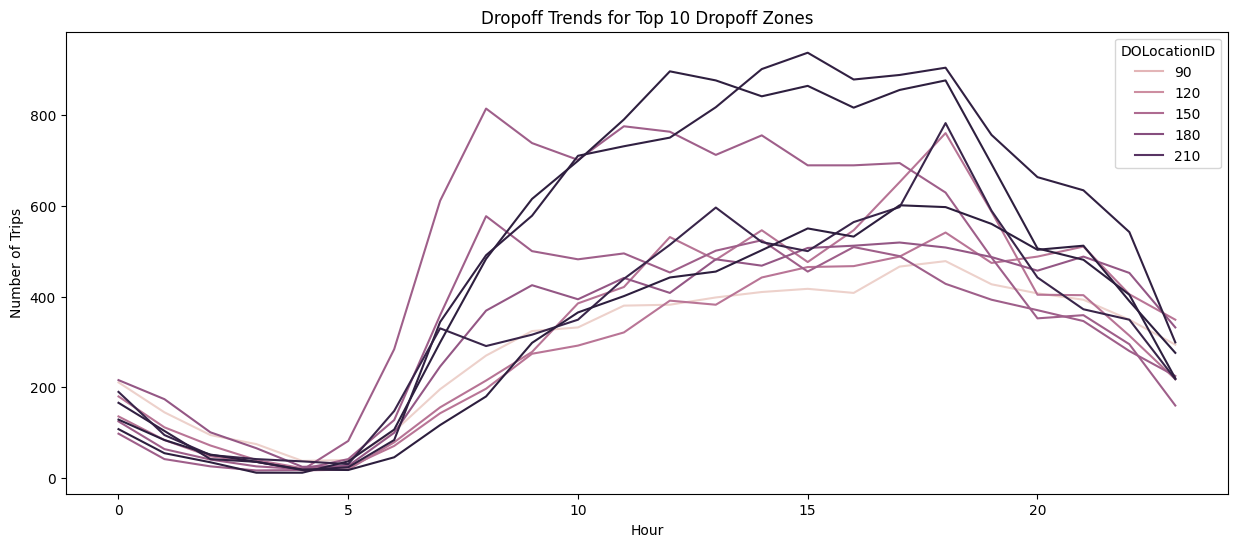

In [684]:
# Find top 10 pickup and dropoff zones
# Find top 10 pickup and dropoff zones
# Group data by pickup location and calculate the number of trips
pickup_zones = df.groupby('PULocationID')['tpep_pickup_datetime'].count()


# Filter data for the top 10 pickup zones
top_pickup_zones = pickup_zones.nlargest(10).index

print('Top Pickup Zones','\n' ,zones[zones['LocationID'].isin(top_pickup_zones)][['LocationID','zone','trip_count','borough']].sort_values('trip_count',ascending=False))

# Group data by dropoff location and calculate the number of trips
dropoff_zones = df.groupby('DOLocationID')['tpep_pickup_datetime'].count() 

# Filter data for the top 10 dropoff zones
top_dropoff_zones = dropoff_zones.nlargest(10).index
print('Top Dropoff Zones','\n',zones[zones['LocationID'].isin(top_dropoff_zones)][['LocationID','zone','trip_count','borough']].sort_values('trip_count',ascending=False))

#show pickup and dropoff trends in these zones
# Group data by pickup location and hour and calculate the number of trips
pickup_hourly_trips = df.groupby(['PULocationID', 'pickup_hour'])['tpep_pickup_datetime'].count()
pickup_hourly_trips = pickup_hourly_trips.reset_index()

top_pickup_hourly_trips = pickup_hourly_trips[pickup_hourly_trips['PULocationID'].isin(top_pickup_zones)]
# Plot the pickup trends for the top 10 pickup zones
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', data=top_pickup_hourly_trips, hue='PULocationID')
plt.title('Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

# Group data by dropoff location and hour and calculate the number of trips
dropoff_hourly_trips = df.groupby(['DOLocationID', 'pickup_hour'])['tpep_pickup_datetime'].count()
dropoff_hourly_trips = dropoff_hourly_trips.reset_index()

top_dropoff_hourly_trips = dropoff_hourly_trips[dropoff_hourly_trips['DOLocationID'].isin(top_dropoff_zones)]
# Plot the dropoff trends for the top 10 dropoff zones
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', data=top_dropoff_hourly_trips, hue='DOLocationID')
plt.title('Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()






**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [698]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


pickup_dropoff_ratio = pickup_zones / dropoff_zones
pickup_dropoff_ratio.head()
print(pickup_dropoff_ratio.sort_values(ascending=False))
# Find the top 10 pickup/dropoff ratios
top_ratios = pickup_dropoff_ratio.nlargest(10)
top_ratio_zones = zones[zones['LocationID'].isin(top_ratios.index)]
top_ratio_zones= top_ratio_zones.merge(top_ratios, left_on='LocationID',right_on=top_ratios.index,how='inner')
top_ratio_zones.rename(columns={'tpep_pickup_datetime':'pickup_dropoff_ratio'},inplace=True)

print('Top Pickup Dropoff ratio \n',top_ratio_zones[['zone','pickup_dropoff_ratio']].sort_values('pickup_dropoff_ratio',ascending=False))
# Find the bottom 10 pickup/dropoff ratios
bottom_ratios = pickup_dropoff_ratio.nsmallest(10)
bottom_ratio_zones = zones[zones['LocationID'].isin(bottom_ratios.index)]
bottom_ratio_zones= bottom_ratio_zones.merge(bottom_ratios, left_on='LocationID',right_on=bottom_ratios.index,how='inner')
bottom_ratio_zones.rename(columns={'tpep_pickup_datetime':'pickup_dropoff_ratio'},inplace=True)
print('Bottom Pickup Dropoff ratio \n',bottom_ratio_zones[['zone','pickup_dropoff_ratio']].sort_values('pickup_dropoff_ratio'))

70    8.13
132   4.68
138   2.89
186   1.52
43    1.38
      ... 
183    NaN
184    NaN
206    NaN
221    NaN
245    NaN
Name: tpep_pickup_datetime, Length: 255, dtype: float64
Top Pickup Dropoff ratio 
                            zone  pickup_dropoff_ratio
1                 East Elmhurst                  8.13
4                   JFK Airport                  4.68
5             LaGuardia Airport                  2.89
8  Penn Station/Madison Sq West                  1.52
0                  Central Park                  1.38
9                  West Village                  1.37
3       Greenwich Village South                  1.35
7                  Midtown East                  1.27
6                Midtown Center                  1.19
2              Garment District                  1.18
Bottom Pickup Dropoff ratio 
                   zone  pickup_dropoff_ratio
7     Sunset Park East                  0.02
9      Windsor Terrace                  0.03
8           Whitestone               

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [717]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Group data by pickup location and hour and calculate the number of trips
night_hours = [23, 0, 1, 2, 3, 4, 5]
night_pickup_trips = full_df_with_zone[full_df_with_zone['pickup_hour'].isin(night_hours)].groupby('PULocationID')['tpep_pickup_datetime'].count().nlargest(10)

night_pickup_zones = zones[zones['LocationID'].isin(night_pickup_trips.index)]
night_pickup_zones= night_pickup_zones.merge(night_pickup_trips, left_on='LocationID',right_on=night_pickup_trips.index,how='inner')
night_pickup_zones.rename(columns={'tpep_pickup_datetime':'night_pickup_trips'},inplace=True)
print('Top 10 zones with night pickups.\n',night_pickup_zones[['zone','night_pickup_trips']].sort_values('night_pickup_trips',ascending=False))
# Group data by dropoff location and hour and calculate the number of trips
night_dropoff_trips = full_df_with_zone[full_df_with_zone['pickup_hour'].isin(night_hours)].groupby('DOLocationID')['tpep_pickup_datetime'].count().nlargest(10)
print(night_dropoff_trips.nlargest(10))
night_dropoff_zones = zones[zones['LocationID'].isin(night_dropoff_trips.index)]
night_dropoff_zones= night_dropoff_zones.merge(night_dropoff_trips, left_on='LocationID',right_on=night_dropoff_trips.index,how='inner')
night_dropoff_zones.rename(columns={'tpep_pickup_datetime':'night_dropoff_trips'},inplace=True)
print('Top 10 zones with night dropoffs.\n',night_dropoff_zones[['zone','night_dropoff_trips']].sort_values('night_dropoff_trips',ascending=False))


Top 10 zones with night pickups.
                            zone  night_pickup_trips
1                  East Village                2340
3                   JFK Airport                2174
9                  West Village                1907
0                  Clinton East                1538
5               Lower East Side                1466
8     Times Sq/Theatre District                1290
2       Greenwich Village South                1281
7  Penn Station/Madison Sq West                1047
4             LaGuardia Airport                 937
6                 Midtown South                 903
DOLocationID
79     1270
48     1047
170     938
68      898
107     881
141     799
263     768
249     705
236     689
90      681
Name: tpep_pickup_datetime, dtype: int64
Top 10 zones with night dropoffs.
                     zone  night_dropoff_trips
2           East Village                 1270
0           Clinton East                 1047
6            Murray Hill                  938
1

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [622]:
# Filter for night hours (11 PM to 5 AM)
night_data = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
night_revenue_df = night_data['total_amount'].sum()
day_data = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]
day_revenue_df = day_data['total_amount'].sum()
print("Total revenue during night hours:", night_revenue_df)
print("Total revenue during day hours:", day_revenue_df)
print("Night revenue share:", (night_revenue_df / (night_revenue_df+day_revenue_df)) * 100,'%')
print("Day revenue share:", (day_revenue_df / (night_revenue_df+day_revenue_df)) * 100,'%')




Total revenue during night hours: 957231.7000000001
Total revenue during day hours: 6917234.289999999
Night revenue share: 12.156147492612385 %
Day revenue share: 87.84385250738761 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
1.00   10.60
2.00    6.31
3.00    4.29
4.00    4.98
5.00    1.58
6.00    1.28
Name: fare_per_mile_per_passenger, dtype: float64


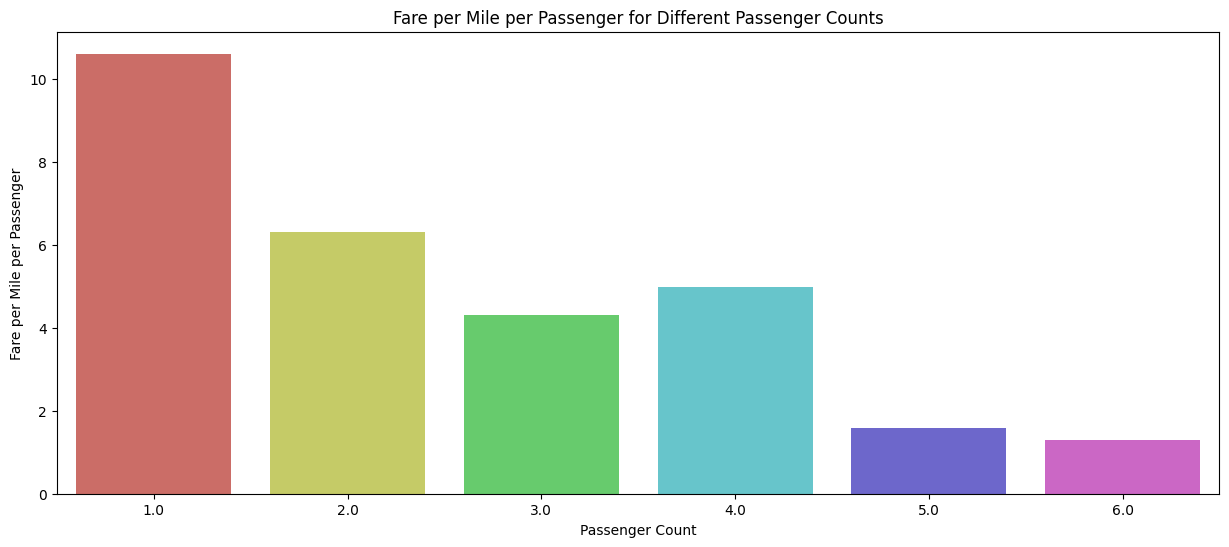

In [718]:
# Analyse the fare per mile per passenger for different passenger counts
# Create a new column for fare per mile per passenger
valid_fare_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
valid_fare_df['fare_per_mile_per_passenger'] = valid_fare_df['fare_amount'] / (valid_fare_df['trip_distance'] * valid_fare_df['passenger_count'])
valid_fare_df['fare_per_mile_per_passenger'].value_counts()

#Group data by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger = valid_fare_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print(fare_per_mile_per_passenger)
# Plot the fare per mile per passenger for different passenger counts
plt.figure(figsize=(15, 6))
sns.barplot(x=fare_per_mile_per_passenger.index, y=fare_per_mile_per_passenger.values, palette='hls')
plt.title('Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger')
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

day_of_week
Friday       9.85
Monday      10.22
Saturday    11.26
Sunday      11.32
Thursday    12.48
Tuesday     11.08
Wednesday   11.44
Name: avg_fare_per_mile, dtype: float64


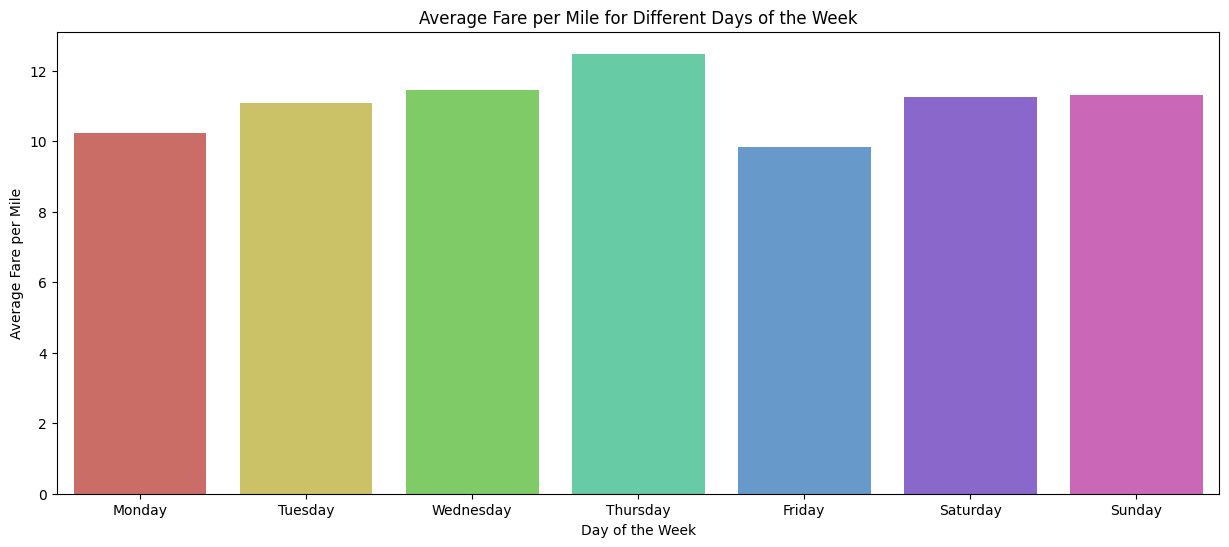

pickup_hour
0    11.81
1    15.05
2     8.95
3     9.38
4    19.43
5    12.09
6    12.69
7     8.61
8     9.81
9     9.49
10   10.47
11    9.87
12   11.64
13   12.63
14   12.30
15   10.76
16   13.82
17   12.04
18   10.24
19   11.73
20    9.60
21    9.33
22   11.91
23    9.62
Name: avg_fare_per_mile, dtype: float64


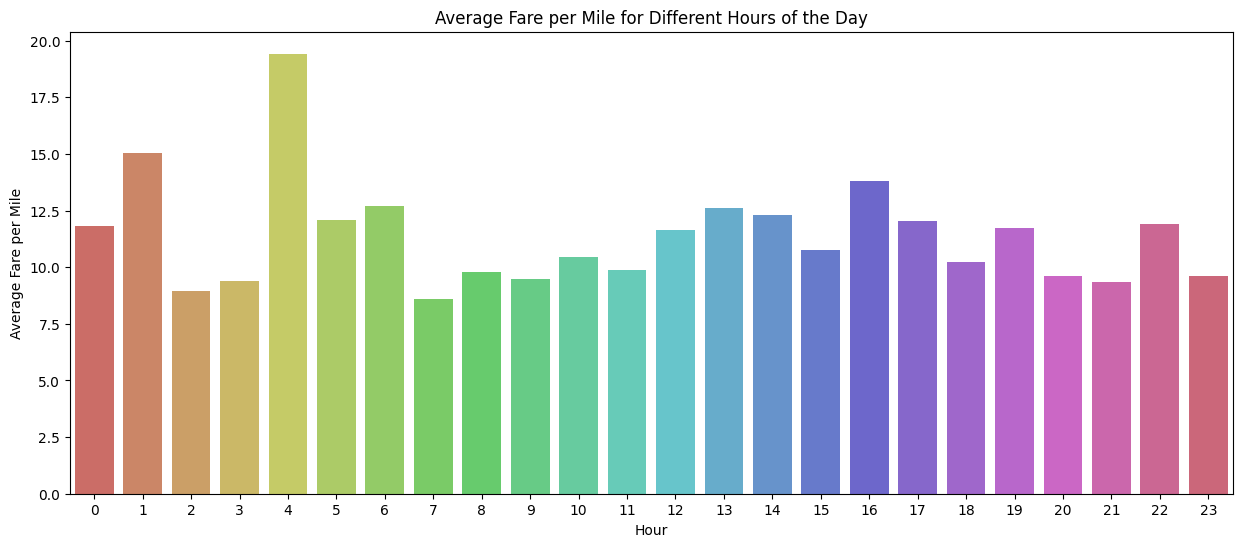

In [627]:
# Compare the average fare per mile for different days and for different times of the day

# Compare the average fare per mile for different days and for different times of the day
# Group data by day of the week and calculate the average fare per mile

valid_fare_df['avg_fare_per_mile'] = valid_fare_df['fare_amount'] / (valid_fare_df['trip_distance'])
fare_per_mile_day = valid_fare_df.groupby('day_of_week')['avg_fare_per_mile'].mean()
print(fare_per_mile_day)
# Plot the average fare per mile for different days of the week
plt.figure(figsize=(15, 6))
sns.barplot(x=fare_per_mile_day.index, y=fare_per_mile_day.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette='hls')
plt.title('Average Fare per Mile for Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.show()
# Group data by hour and calculate the average fare per mile
fare_per_mile_hour = valid_fare_df.groupby('pickup_hour')['avg_fare_per_mile'].mean()
print(fare_per_mile_hour)
# Plot the average fare per mile for different hours of the day
plt.figure(figsize=(15, 6))
sns.barplot(x=fare_per_mile_hour.index, y=fare_per_mile_hour.values,palette='hls')
plt.title('Average Fare per Mile for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare per Mile')
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

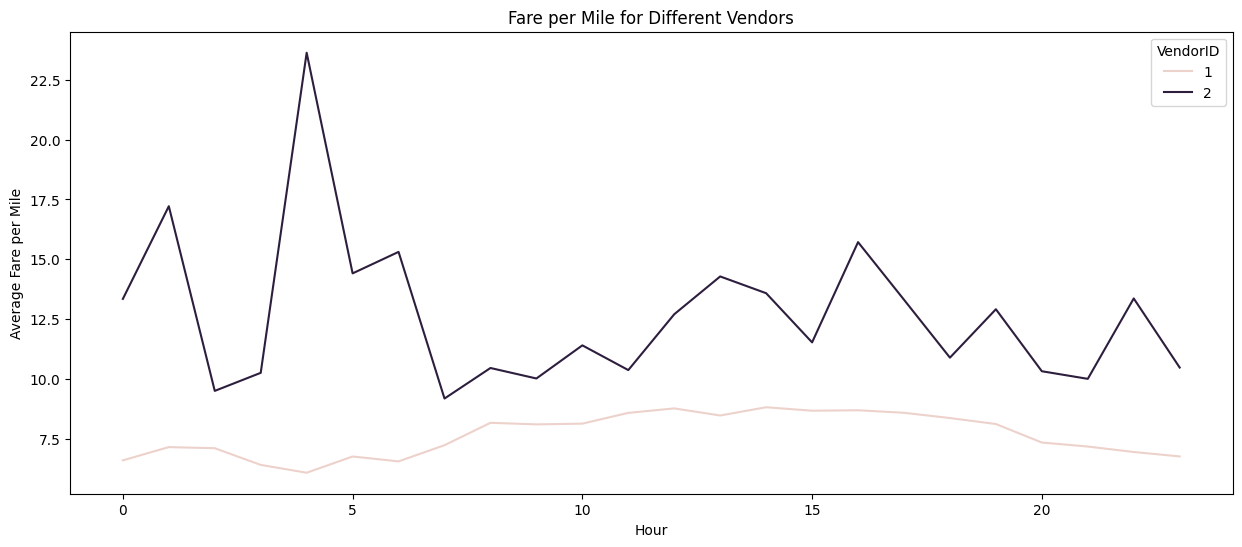

In [628]:
# Compare fare per mile for different vendors
# Group data by vendor ID and hour and calculate the average fare per mile
fare_per_mile_vendor_per_hour = valid_fare_df.groupby(['VendorID', 'pickup_hour'])['avg_fare_per_mile'].mean()
fare_per_mile_vendor_per_hour = fare_per_mile_vendor_per_hour.reset_index()

# Plot the fare per mile for different vendors
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='avg_fare_per_mile', data=fare_per_mile_vendor_per_hour, hue='VendorID')
plt.title('Fare per Mile for Different Vendors')
plt.xlabel('Hour')
plt.ylabel('Average Fare per Mile')
plt.show()




**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


distance_tier
0-2   15.44
2-5    6.50
5+     4.48
Name: avg_fare_per_mile, dtype: float64


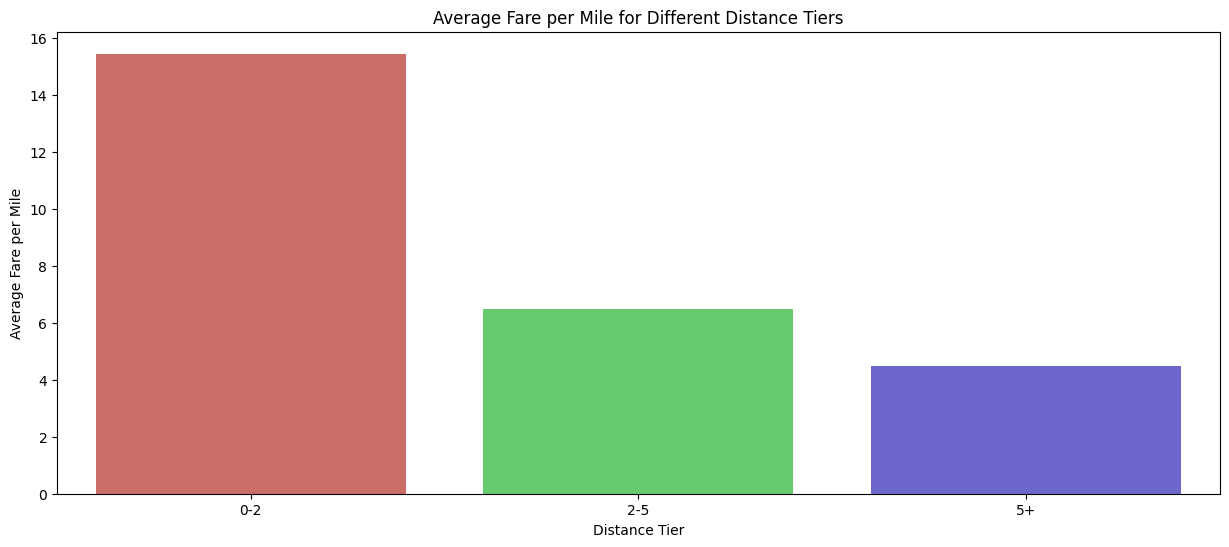

In [632]:
# Defining distance tiers
distance_tiers = ['0-2', '2-5', '5+']
# Create a new column for distance tier
valid_fare_df['distance_tier'] = pd.cut(valid_fare_df['trip_distance'], bins=[0, 2, 5, np.inf], labels=distance_tiers)
# Group data by distance tier and calculate the average fare per mile
fare_per_mile_distance_tier = valid_fare_df.groupby('distance_tier')['avg_fare_per_mile'].mean()
print(fare_per_mile_distance_tier)
# Plot the average fare per mile for different distance tiers
plt.figure(figsize=(15, 6))
sns.barplot(x=fare_per_mile_distance_tier.index, y=fare_per_mile_distance_tier.values,palette='hls')
plt.title('Average Fare per Mile for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

distance_tier
0-2   12.14
2-5   12.26
5+    11.24
Name: tip_percentage, dtype: float64


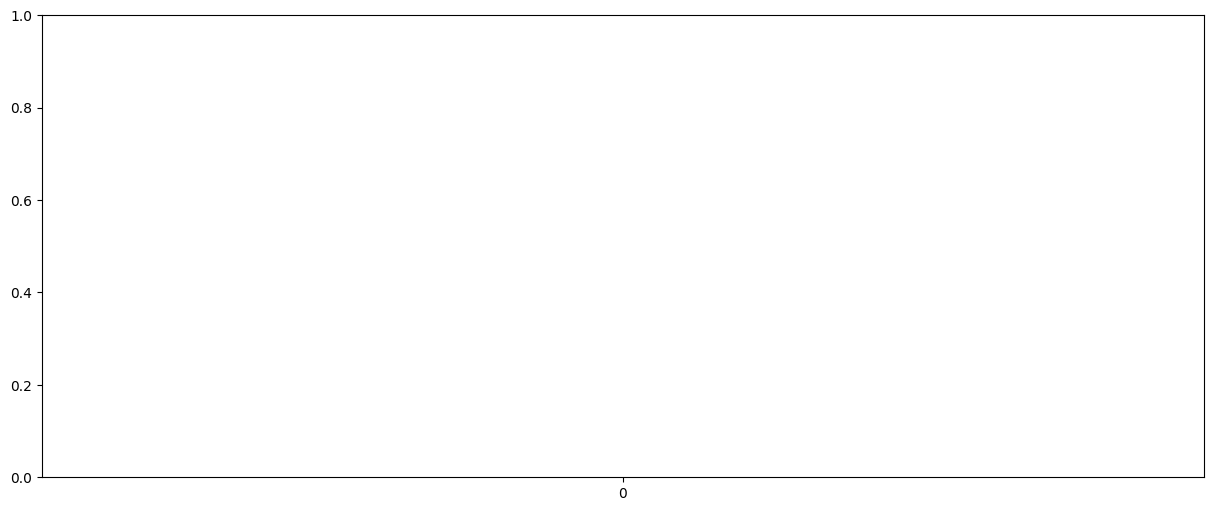

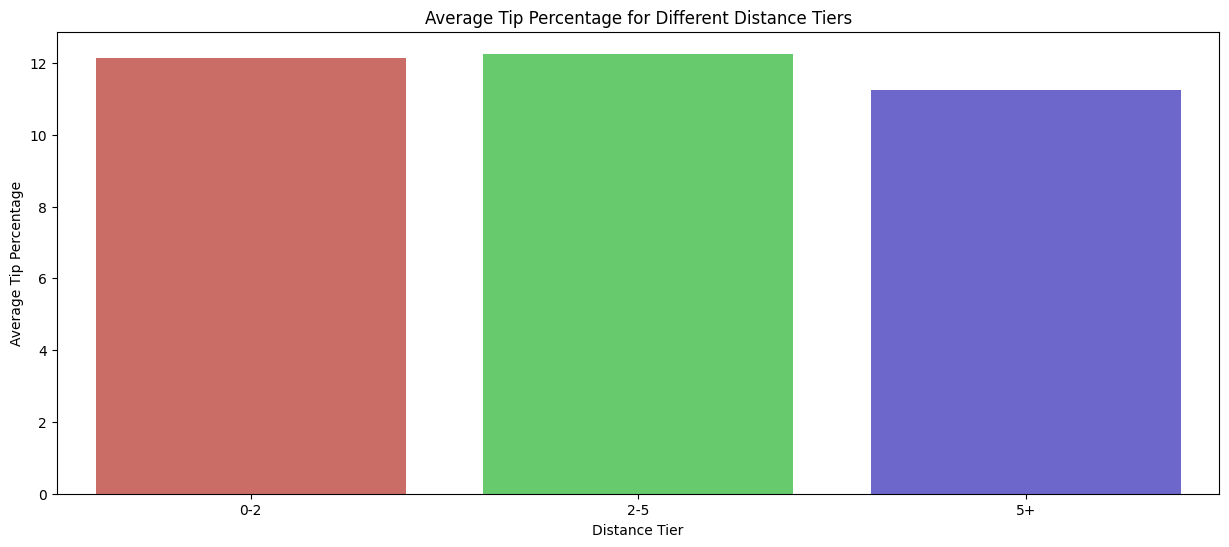

passenger_count
1.00   12.15
2.00   11.74
3.00   11.28
4.00   10.41
5.00   12.29
6.00   12.24
Name: tip_percentage, dtype: float64


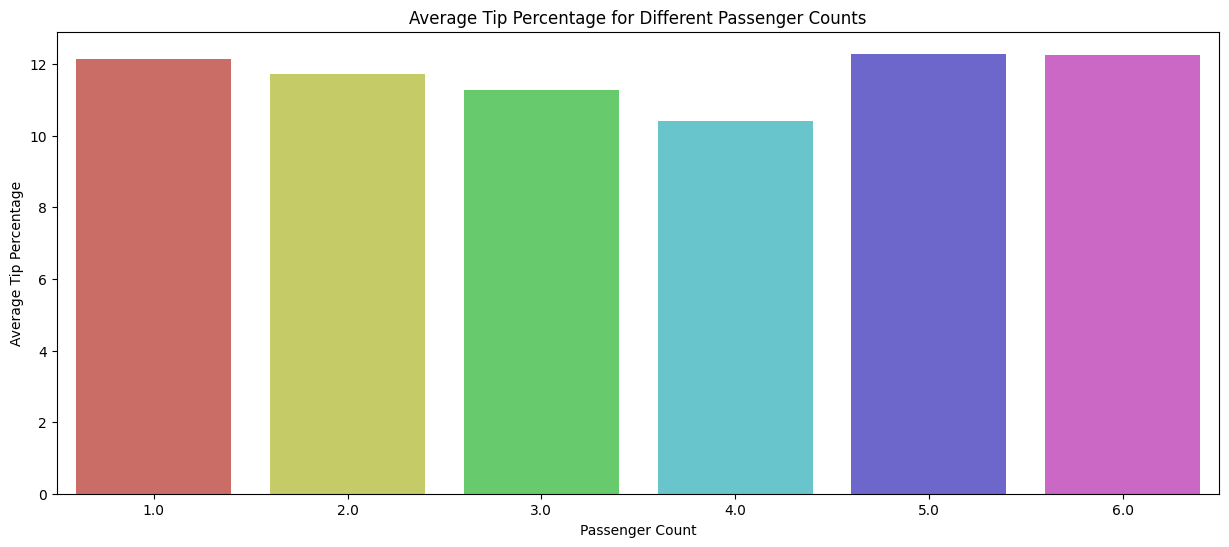

pickup_hour
0    12.05
1    12.14
2    11.61
3    11.30
4    10.02
5     9.98
6    11.24
7    11.79
8    12.22
9    12.02
10   11.79
11   11.75
12   11.77
13   11.71
14   11.83
15   11.75
16   11.82
17   12.18
18   12.27
19   12.26
20   12.40
21   12.63
22   12.60
23   12.16
Name: tip_percentage, dtype: float64


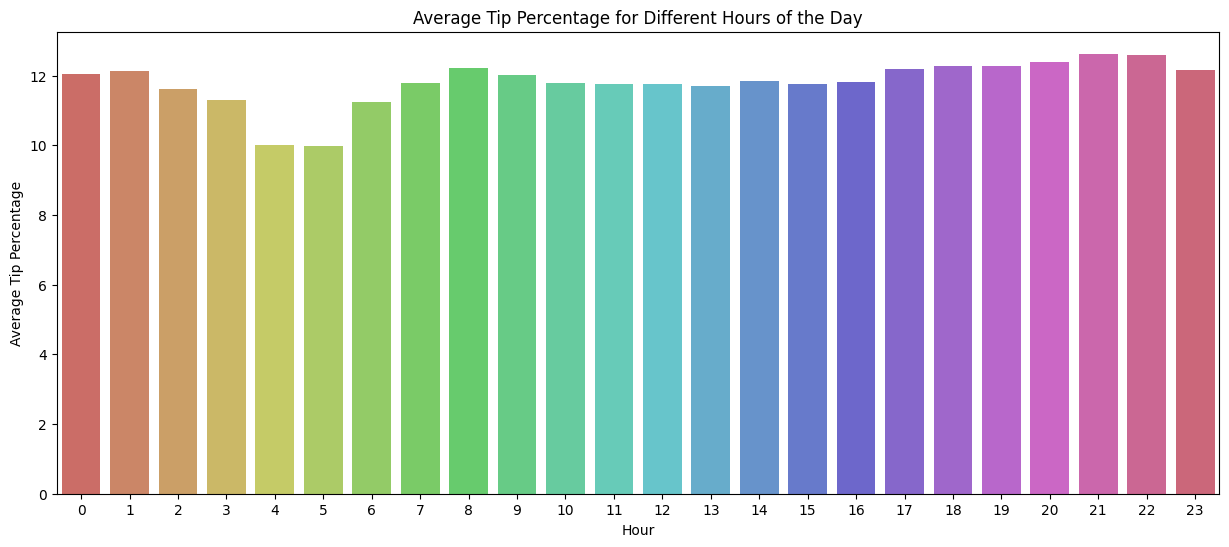

In [639]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Create a new column for tip percentage
valid_fare_df['tip_percentage'] = (valid_fare_df['tip_amount'] / valid_fare_df['total_amount']) * 100
valid_fare_df['tip_percentage'].value_counts()
# Group data by distance tier and calculate the average tip percentage
tip_percentage_distance_tier = valid_fare_df.groupby('distance_tier')['tip_percentage'].mean()
print(tip_percentage_distance_tier)
# Plot the average tip percentage for different distance tiers
plt.figure(figsize=(15, 6))
sns.barplot(x=tip_percentage_distance_tier.index, y=tip_percentage_distance_tier.values,palette='hls')
plt.title('Average Tip Percentage for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.show()
# Group data by passenger count and calculate the average tip percentage
tip_percentage_passenger_count = valid_fare_df.groupby('passenger_count')['tip_percentage'].mean()
print(tip_percentage_passenger_count)
# Plot the average tip percentage for different passenger counts
plt.figure(figsize=(15, 6))
sns.barplot(x=tip_percentage_passenger_count.index, y=tip_percentage_passenger_count.values,palette='hls')
plt.title('Average Tip Percentage for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()
# Group data by hour and calculate the average tip percentage
tip_percentage_hour = valid_fare_df.groupby('pickup_hour')['tip_percentage'].mean()
print(tip_percentage_hour)
# Plot the average tip percentage for different hours of the day
plt.figure(figsize=(15, 6))
sns.barplot(x=tip_percentage_hour.index, y=tip_percentage_hour.values,palette='hls')
plt.title('Average Tip Percentage for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Tip Percentage')
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

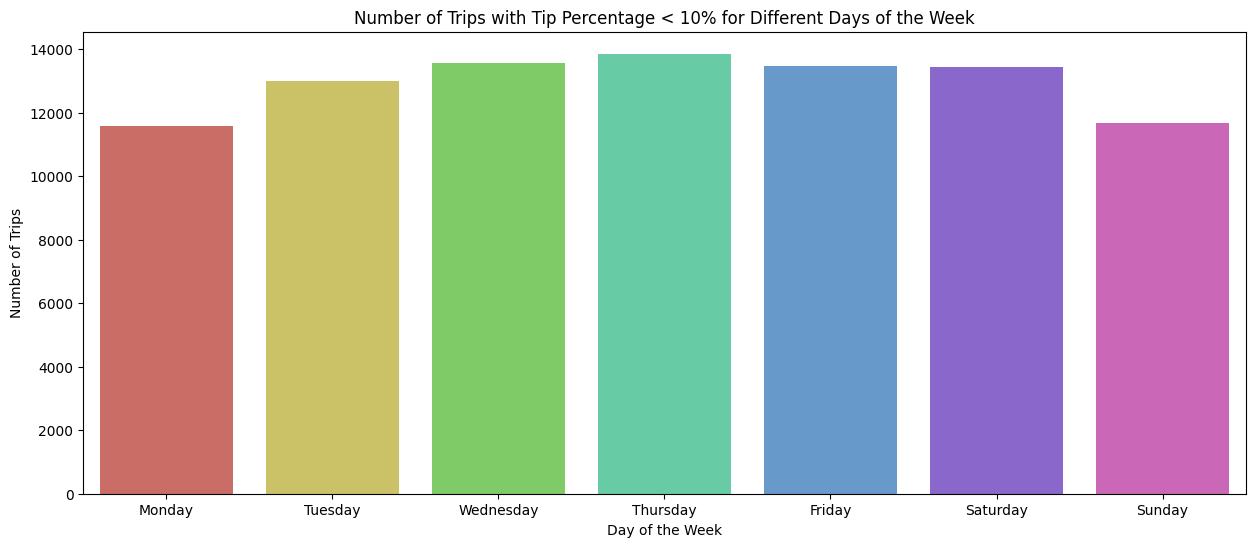

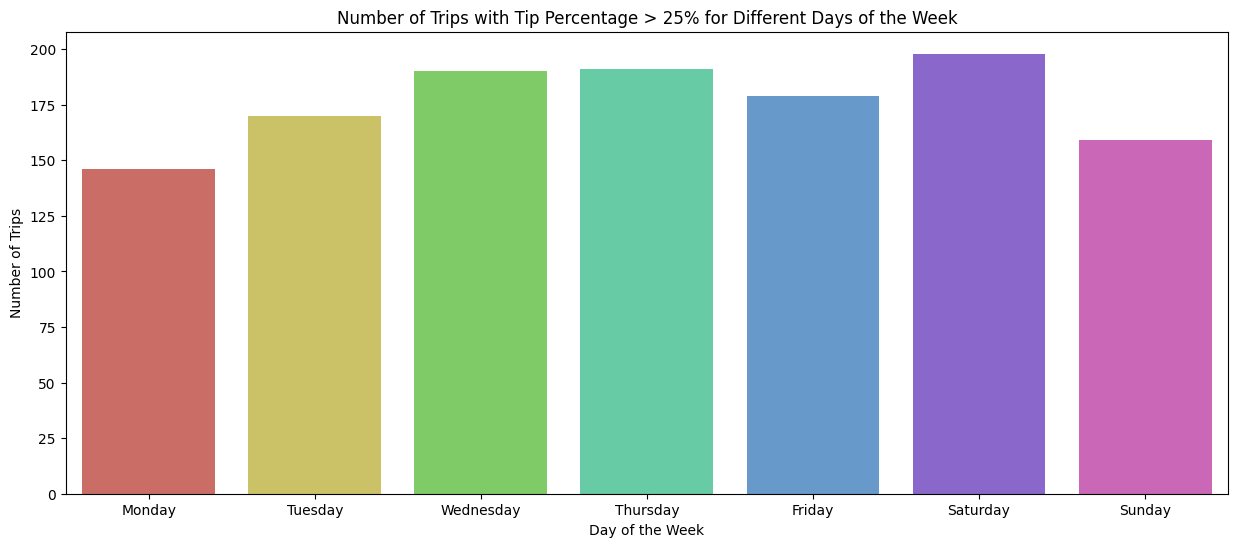

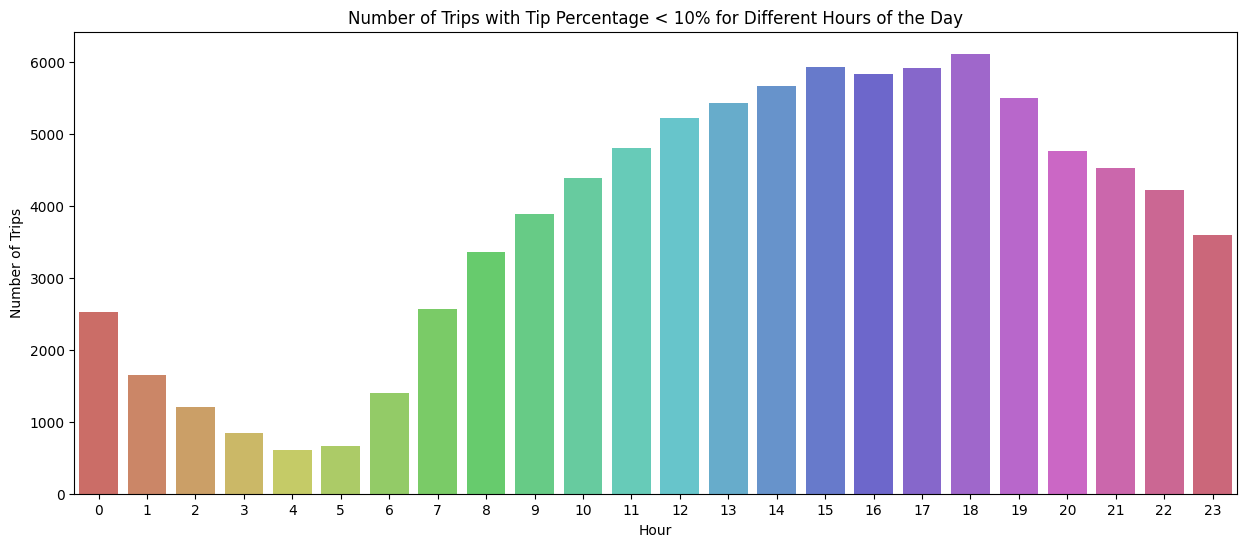

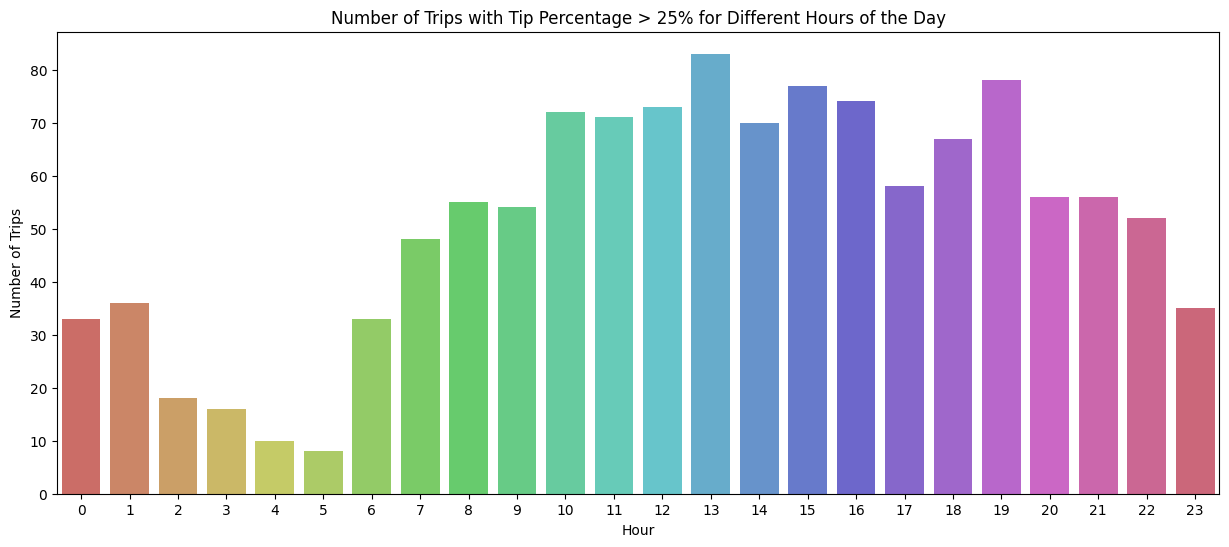

passenger_count
1.00   2.58
2.00   2.25
3.00   1.93
4.00   1.49
5.00   2.66
6.00   2.53
Name: tip_percentage, dtype: float64
passenger_count
1.00   33.72
2.00   33.33
3.00   31.57
4.00   34.63
5.00   32.71
6.00   34.90
Name: tip_percentage, dtype: float64


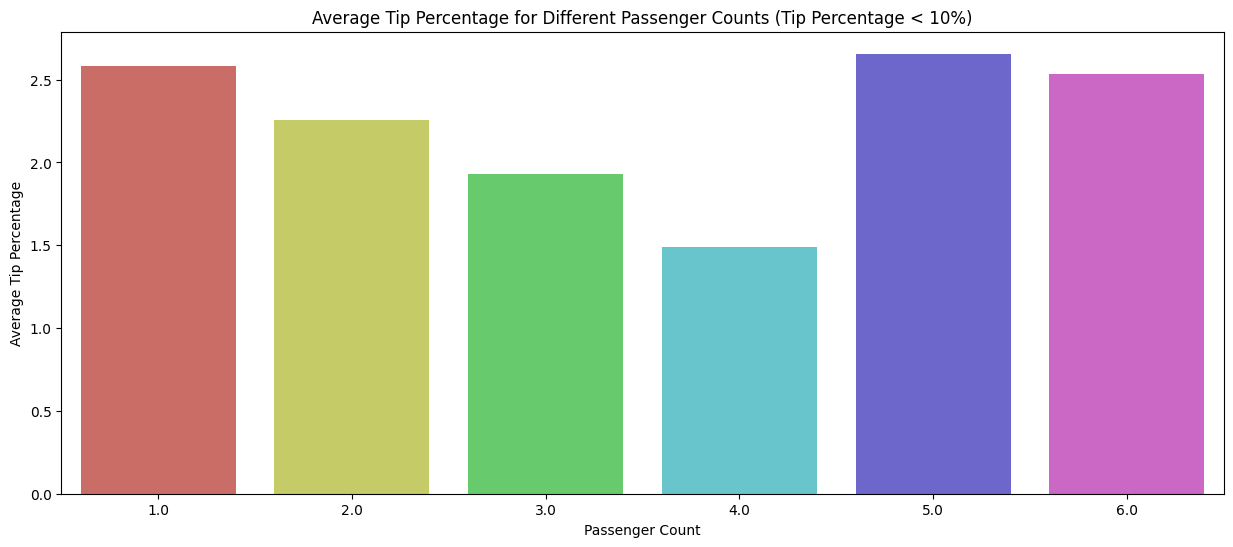

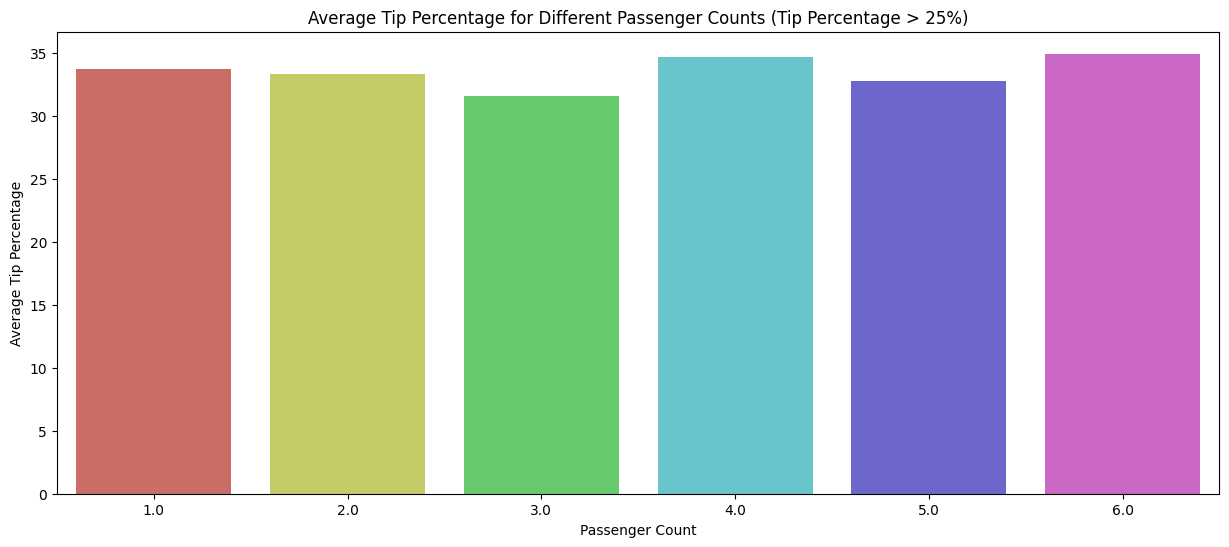

distance_tier
0-2   2.37
2-5   2.96
5+    2.09
Name: tip_percentage, dtype: float64
distance_tier
0-2   33.86
2-5   33.50
5+    30.40
Name: tip_percentage, dtype: float64


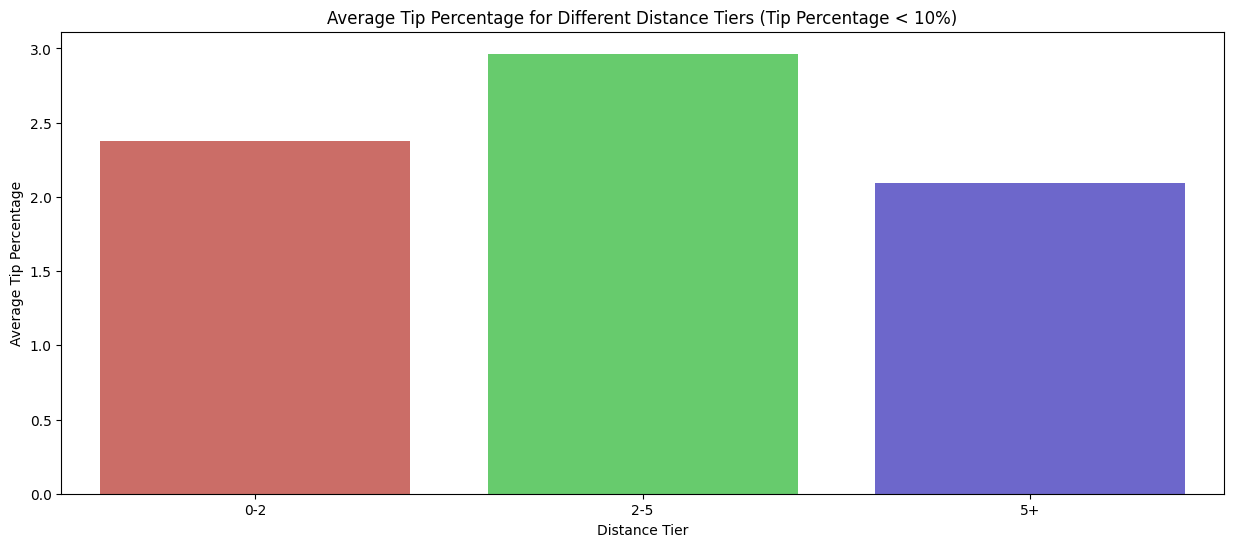

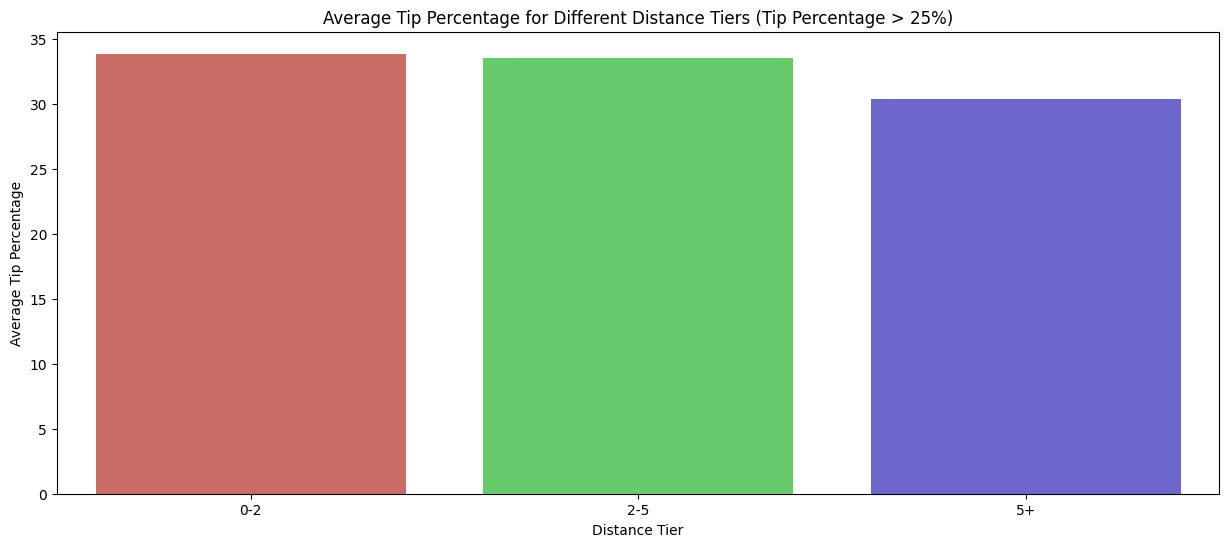

pickup_hour
0    2.77
1    2.57
2    2.42
3    2.35
4    1.65
5    1.84
6    2.45
7    2.74
8    2.86
9    2.48
10   2.09
11   2.08
12   2.08
13   2.04
14   2.15
15   2.26
16   2.30
17   2.61
18   2.84
19   2.80
20   2.77
21   2.88
22   2.91
23   2.70
Name: tip_percentage, dtype: float64
pickup_hour
0    34.72
1    37.19
2    38.52
3    37.30
4    38.40
5    31.15
6    33.56
7    31.54
8    34.00
9    33.30
10   33.83
11   32.08
12   35.38
13   33.86
14   33.59
15   32.80
16   33.37
17   32.10
18   32.77
19   32.92
20   34.04
21   31.68
22   34.22
23   33.91
Name: tip_percentage, dtype: float64


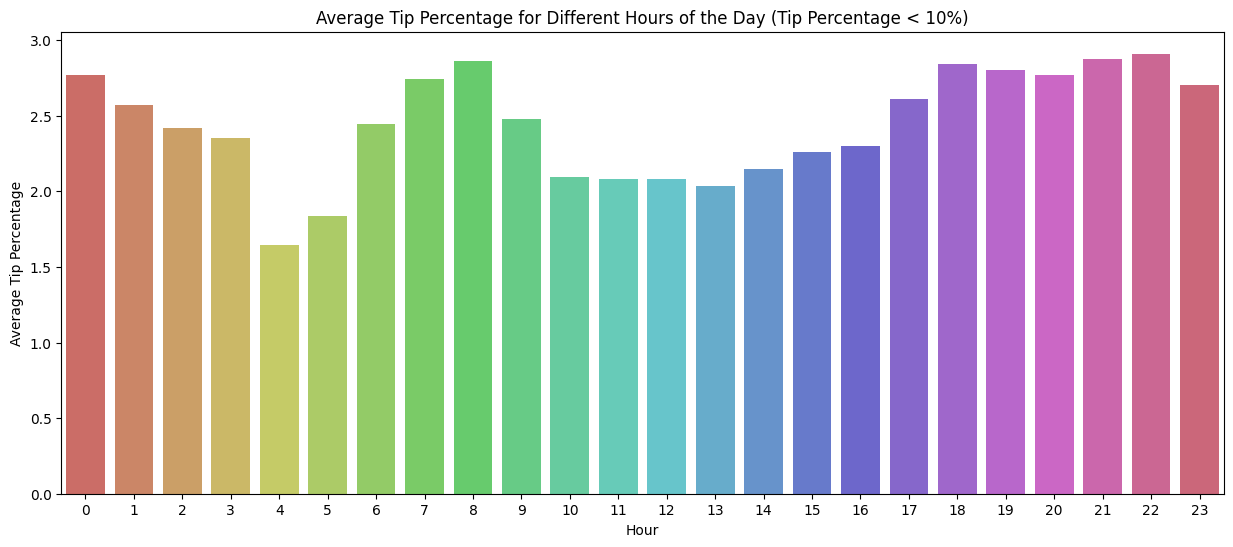

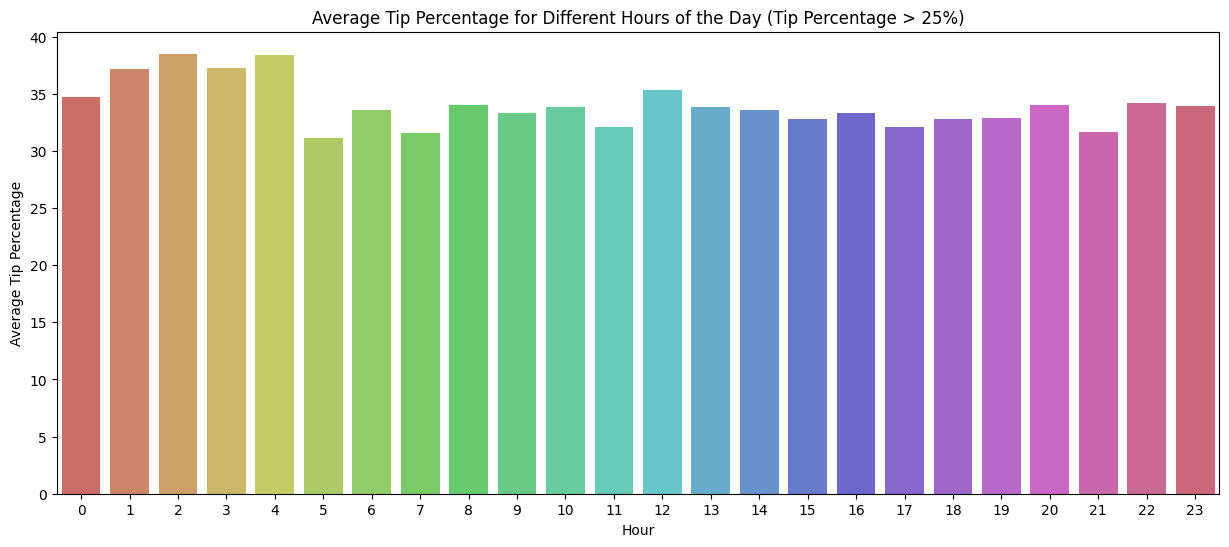

In [640]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter data for trips with tip percentage < 10% and trips with tip percentage > 25%
low_tip_trips = valid_fare_df[valid_fare_df['tip_percentage'] < 10]
high_tip_trips = valid_fare_df[valid_fare_df['tip_percentage'] > 25]
# Group data by day of the week and calculate the number of trips
low_tip_day = low_tip_trips.groupby('day_of_week')['tpep_pickup_datetime'].count()
high_tip_day = high_tip_trips.groupby('day_of_week')['tpep_pickup_datetime'].count()
# Plot the number of trips for different days of the week
plt.figure(figsize=(15, 6))
sns.barplot(x=low_tip_day.index, y=low_tip_day.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette='hls')
plt.title('Number of Trips with Tip Percentage < 10% for Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()
plt.figure(figsize=(15, 6))
sns.barplot(x=high_tip_day.index, y=high_tip_day.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette='hls')
plt.title('Number of Trips with Tip Percentage > 25% for Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()
# Group data by hour and calculate the number of trips
low_tip_hour = low_tip_trips.groupby('pickup_hour')['tpep_pickup_datetime'].count()
high_tip_hour = high_tip_trips.groupby('pickup_hour')['tpep_pickup_datetime'].count()
# Plot the number of trips for different hours of the day
plt.figure(figsize=(15, 6))
sns.barplot(x=low_tip_hour.index, y=low_tip_hour.values,palette='hls')
plt.title('Number of Trips with Tip Percentage < 10% for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=high_tip_hour.index, y=high_tip_hour.values,palette='hls')
plt.title('Number of Trips with Tip Percentage > 25% for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

#show which other parameters influence high tip percentages and low tip percentage
# Group data by passenger count and calculate the average tip percentage
low_tip_passenger_count = low_tip_trips.groupby('passenger_count')['tip_percentage'].mean()
high_tip_passenger_count = high_tip_trips.groupby('passenger_count')['tip_percentage'].mean()
print(low_tip_passenger_count)
print(high_tip_passenger_count)
# Plot the average tip percentage for different passenger counts
plt.figure(figsize=(15, 6))
sns.barplot(x=low_tip_passenger_count.index, y=low_tip_passenger_count.values,palette='hls')
plt.title('Average Tip Percentage for Different Passenger Counts (Tip Percentage < 10%)')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()
plt.figure(figsize=(15, 6))
sns.barplot(x=high_tip_passenger_count.index, y=high_tip_passenger_count.values,palette='hls')
plt.title('Average Tip Percentage for Different Passenger Counts (Tip Percentage > 25%)')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()
# Group data by distance tier and calculate the average tip percentage
low_tip_distance_tier = low_tip_trips.groupby('distance_tier')['tip_percentage'].mean()
high_tip_distance_tier = high_tip_trips.groupby('distance_tier')['tip_percentage'].mean()
print(low_tip_distance_tier)
print(high_tip_distance_tier)
# Plot the average tip percentage for different distance tiers
plt.figure(figsize=(15, 6))
sns.barplot(x=low_tip_distance_tier.index, y=low_tip_distance_tier.values,palette='hls')
plt.title('Average Tip Percentage for Different Distance Tiers (Tip Percentage < 10%)')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.show()
plt.figure(figsize=(15, 6))
sns.barplot(x=high_tip_distance_tier.index, y=high_tip_distance_tier.values,palette='hls')
plt.title('Average Tip Percentage for Different Distance Tiers (Tip Percentage > 25%)')
plt.xlabel('Distance Tier') 
plt.ylabel('Average Tip Percentage')
plt.show()
# Group data by hour and calculate the average tip percentage
low_tip_hour = low_tip_trips.groupby('pickup_hour')['tip_percentage'].mean()
high_tip_hour = high_tip_trips.groupby('pickup_hour')['tip_percentage'].mean()
print(low_tip_hour)
print(high_tip_hour)
# Plot the average tip percentage for different hours of the day
plt.figure(figsize=(15, 6))
sns.barplot(x=low_tip_hour.index, y=low_tip_hour.values,palette='hls')
plt.title('Average Tip Percentage for Different Hours of the Day (Tip Percentage < 10%)')
plt.xlabel('Hour')
plt.ylabel('Average Tip Percentage')
plt.show()
plt.figure(figsize=(15, 6))
sns.barplot(x=high_tip_hour.index, y=high_tip_hour.values,palette='hls')
plt.title('Average Tip Percentage for Different Hours of the Day (Tip Percentage > 25%)')
plt.xlabel('Hour')
plt.ylabel('Average Tip Percentage')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

day_of_week
Friday      1.41
Monday      1.36
Saturday    1.47
Sunday      1.46
Thursday    1.34
Tuesday     1.33
Wednesday   1.33
Name: passenger_count, dtype: float64


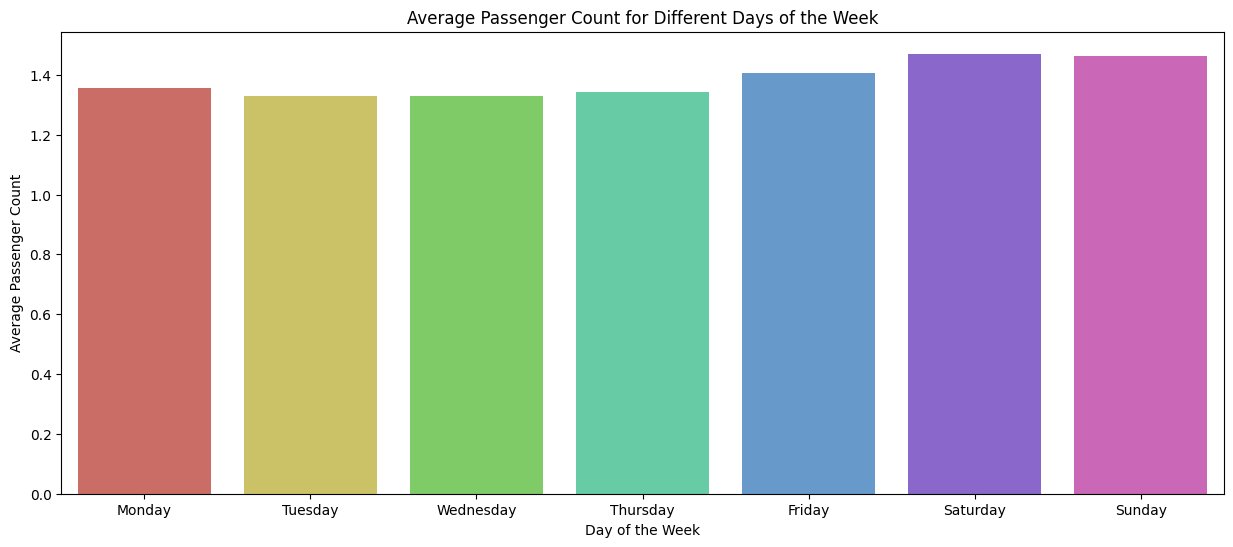

pickup_hour
0    1.41
1    1.46
2    1.43
3    1.43
4    1.36
5    1.30
6    1.24
7    1.27
8    1.30
9    1.32
10   1.36
11   1.36
12   1.37
13   1.37
14   1.40
15   1.41
16   1.40
17   1.38
18   1.38
19   1.39
20   1.40
21   1.42
22   1.44
23   1.44
Name: passenger_count, dtype: float64


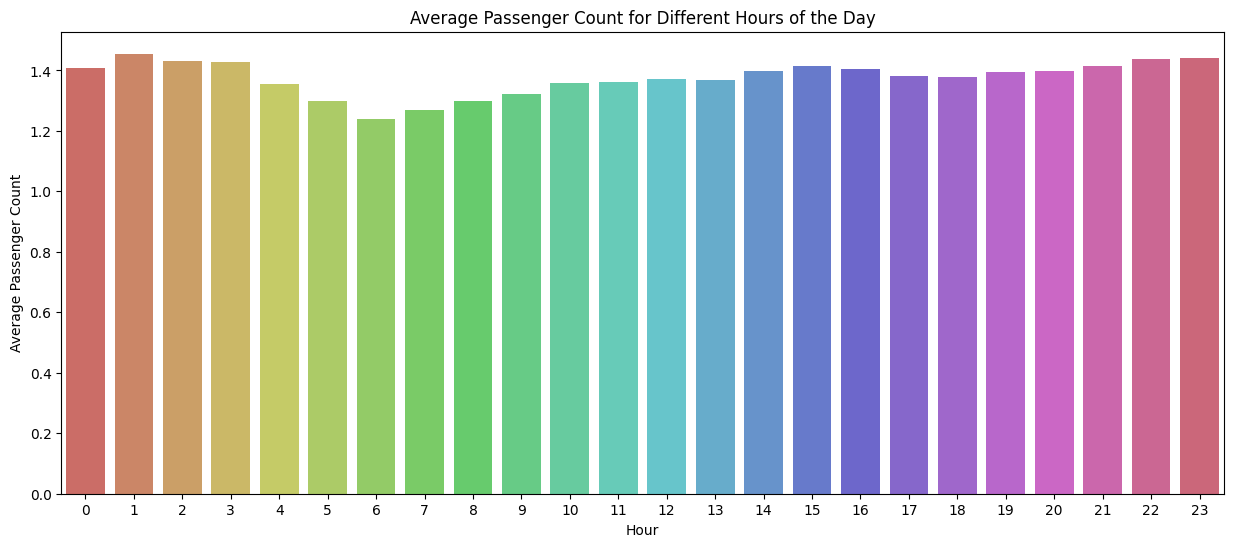

    day_of_week  pickup_hour  passenger_count
0        Friday            0             1.36
1        Friday            1             1.35
2        Friday            2             1.39
3        Friday            3             1.40
4        Friday            4             1.30
..          ...          ...              ...
163   Wednesday           19             1.33
164   Wednesday           20             1.35
165   Wednesday           21             1.37
166   Wednesday           22             1.38
167   Wednesday           23             1.37

[168 rows x 3 columns]


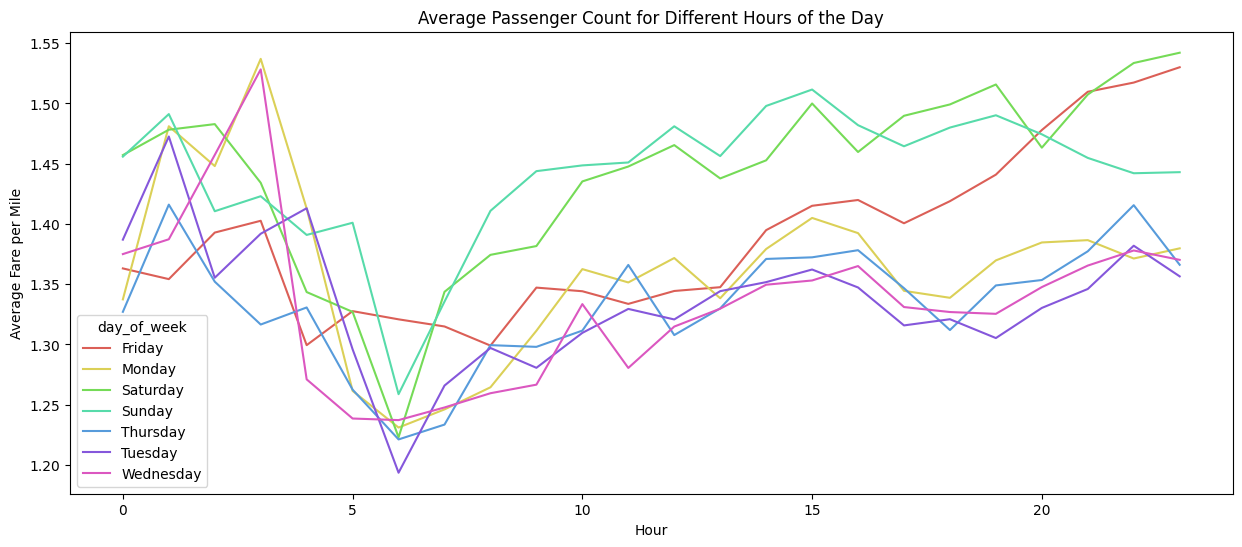

In [719]:
# See how passenger count varies across hours and days
# Group data by day of the week and calculate the average passenger count
passenger_count_day = df.groupby('day_of_week')['passenger_count'].mean()
print(passenger_count_day)
# Plot the average passenger count for different days of the week
plt.figure(figsize=(15, 6))
sns.barplot(x=passenger_count_day.index, y=passenger_count_day.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette='hls')
plt.title('Average Passenger Count for Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.show()


# Group data by hour and calculate the average passenger count
passenger_count_hour = df.groupby('pickup_hour')['passenger_count'].mean()
print(passenger_count_hour)
# Plot the average passenger count for different hours of the day
plt.figure(figsize=(15, 6))
sns.barplot(x=passenger_count_hour.index, y=passenger_count_hour.values,palette='hls')
plt.title('Average Passenger Count for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Passenger Count')
plt.show()
# Group data by day of the week and calculate the average passenger count
passenger_count_day = df.groupby(['day_of_week','pickup_hour'])['passenger_count'].mean()
passenger_count_day = passenger_count_day.reset_index()

print(passenger_count_day)
# Plot the average passenger count for different hour of day for each day in a week
plt.figure(figsize=(15, 6))
sns.lineplot(x='pickup_hour', y='passenger_count', data=passenger_count_day, hue='day_of_week',palette='hls')
plt.title('Average Passenger Count for Different Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare per Mile')
plt.show()





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

LocationID
154   2.00
6     2.00
253   2.00
175   1.83
67    1.80
      ... 
44    1.00
46    1.00
51    1.00
54    1.00
136   1.00
Name: passenger_count, Length: 238, dtype: float64


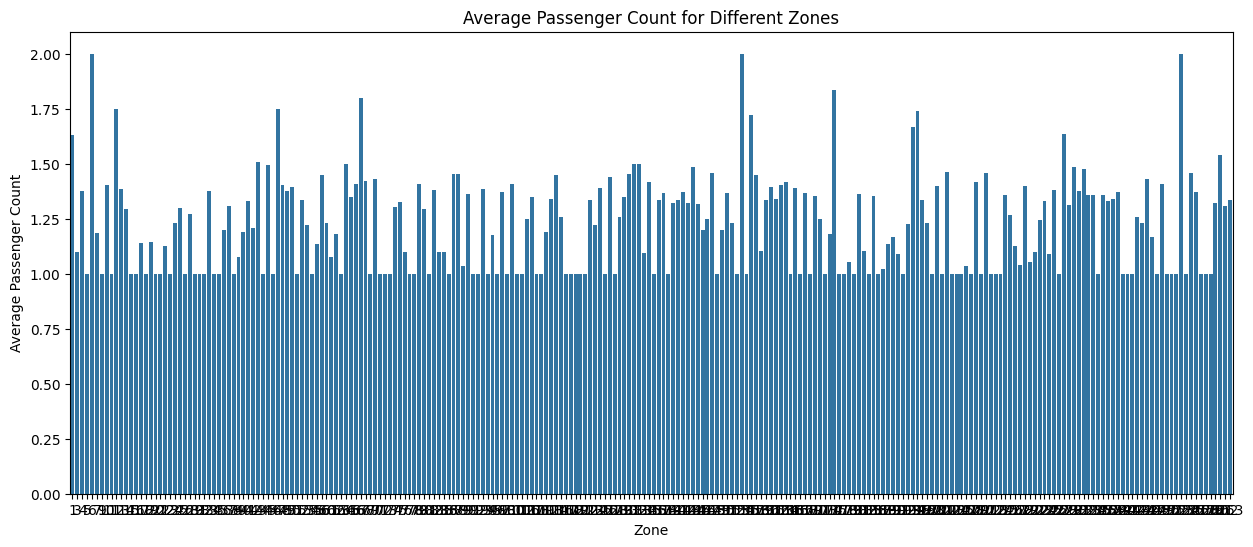

In [642]:
# How does passenger count vary across zones
full_df_with_zone.head()
# Group data by pickup location and calculate the average passenger count
passenger_count_zone = full_df_with_zone.groupby('LocationID')['passenger_count'].mean()
print(passenger_count_zone.sort_values(ascending=False))
# Plot the average passenger count for different zones
plt.figure(figsize=(15, 6))
sns.barplot(x=passenger_count_zone.index, y=passenger_count_zone.values)
plt.title('Average Passenger Count for Different Zones')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.show()


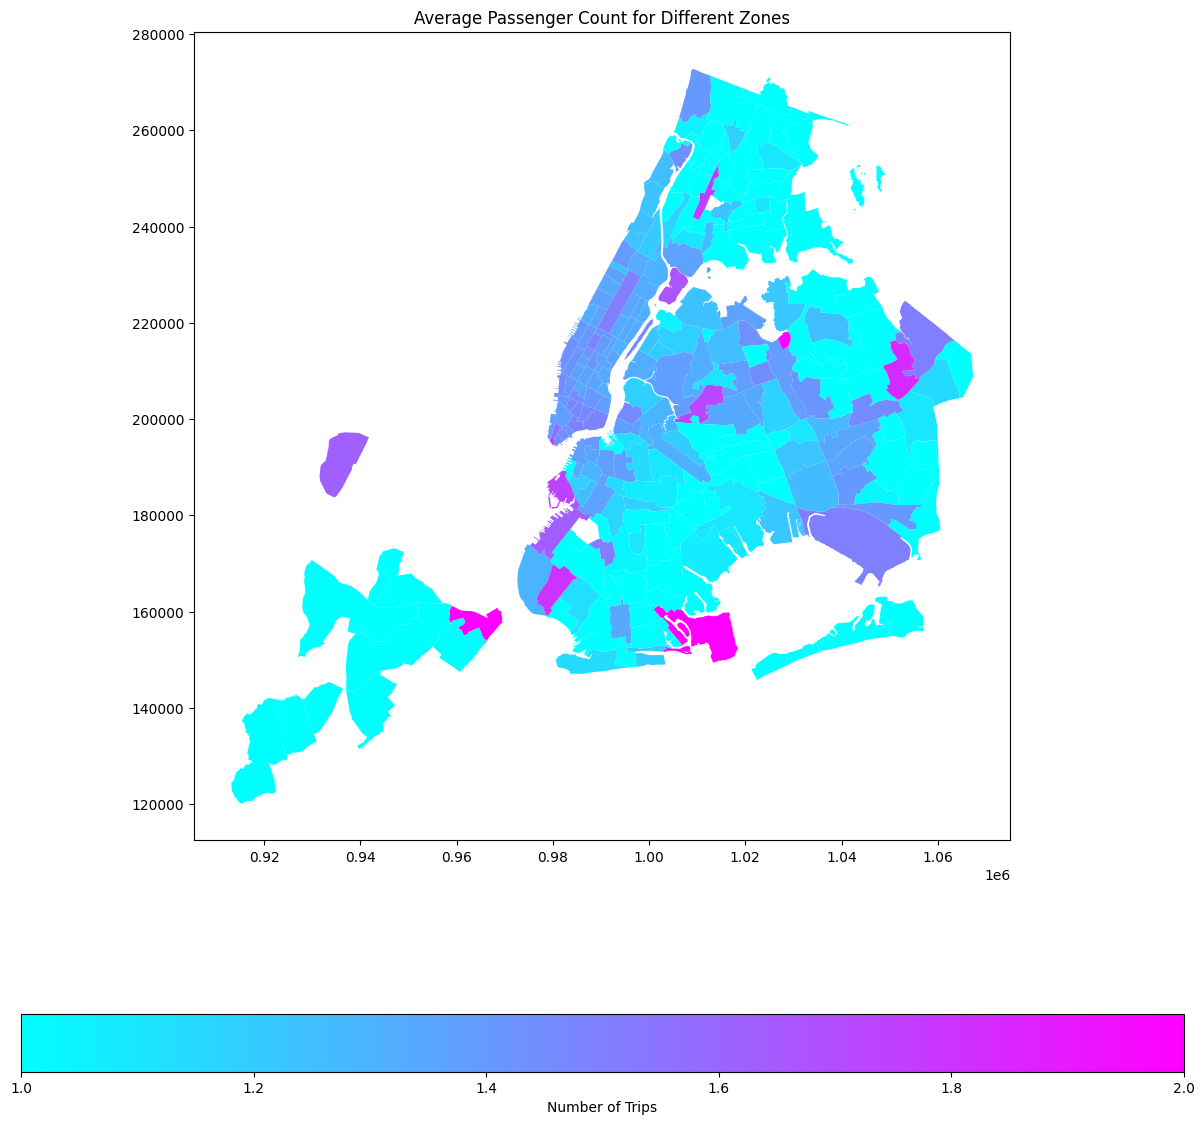

In [643]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Merge passenger count with zones GeoDataFrame
zones = zones.merge(passenger_count_zone, left_on='LocationID', right_on='LocationID', how='left')
zones.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# Plot the map and display it
zones.plot(column='avg_passenger_count', ax=ax, legend=True, cmap='cool', legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Average Passenger Count for Different Zones')
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

extra
0.00     104554
2.50      69767
1.00      54213
5.00      20162
3.50      16041
6.00       2436
7.50       2370
9.25        940
4.25        929
1.75        470
3.75        403
2.75        324
6.75        324
8.75        316
10.25       236
1.25        211
7.75        202
11.75       170
2.25        145
6.25        126
9.75         82
10.00        76
11.25        64
8.50         61
7.25         59
3.20          9
5.25          4
3.00          2
0.75          2
2.45          2
3.25          2
0.50          2
4.75          2
14.25         1
12.50         1
6.80          1
2.72          1
Name: count, dtype: int64


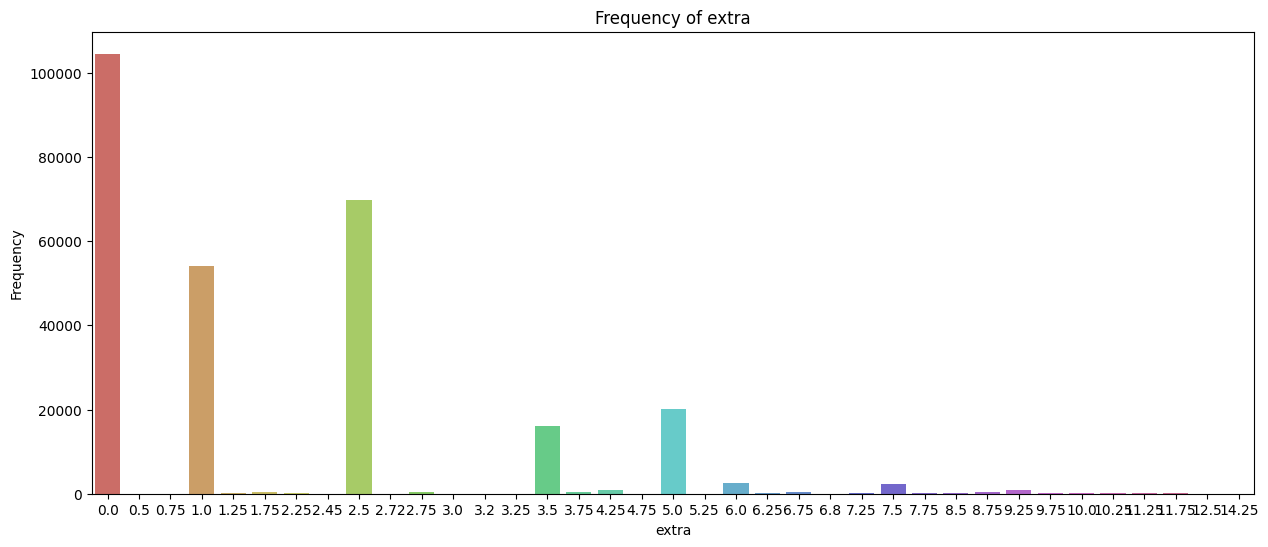

PULocationID
138   6.25
70    4.64
57    2.50
46    2.50
161   1.66
      ... 
204   0.00
118   0.00
119   0.00
201   0.00
220   0.00
Name: extra, Length: 241, dtype: float64


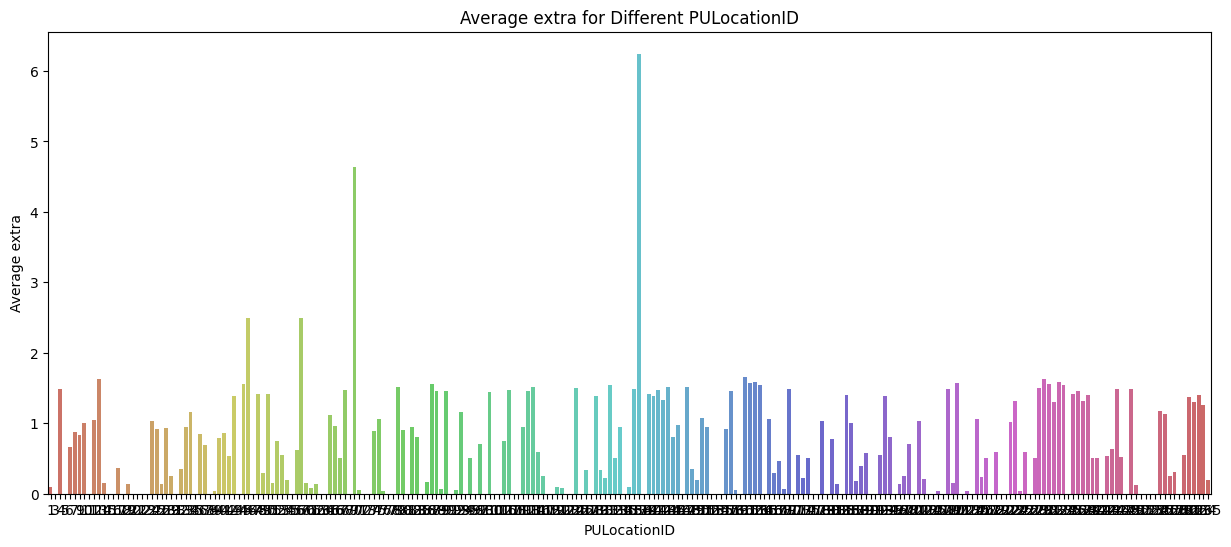

DOLocationID
138   5.80
204   4.25
8     3.62
70    3.32
252   3.31
      ... 
253   0.20
154   0.20
44    0.17
207   0.06
30    0.00
Name: extra, Length: 255, dtype: float64


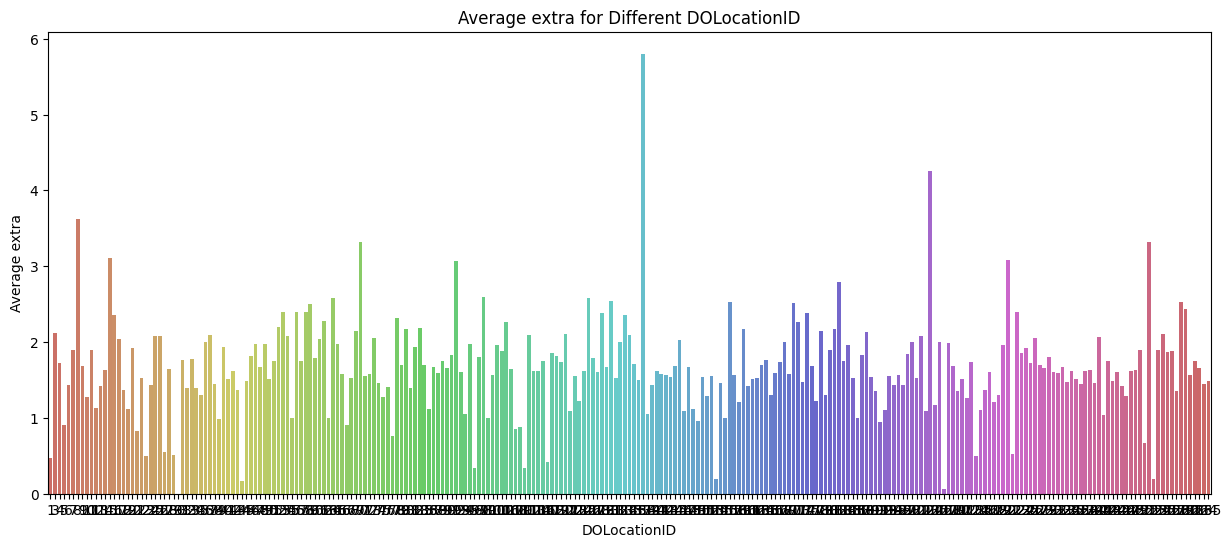

pickup_hour
17   2.75
18   2.71
16   2.68
19   2.66
5    1.89
23   1.80
20   1.80
21   1.75
22   1.72
4    1.70
0    1.68
3    1.60
2    1.57
1    1.55
10   0.99
11   0.98
9    0.97
13   0.97
14   0.96
15   0.96
12   0.95
6    0.93
8    0.92
7    0.92
Name: extra, dtype: float64


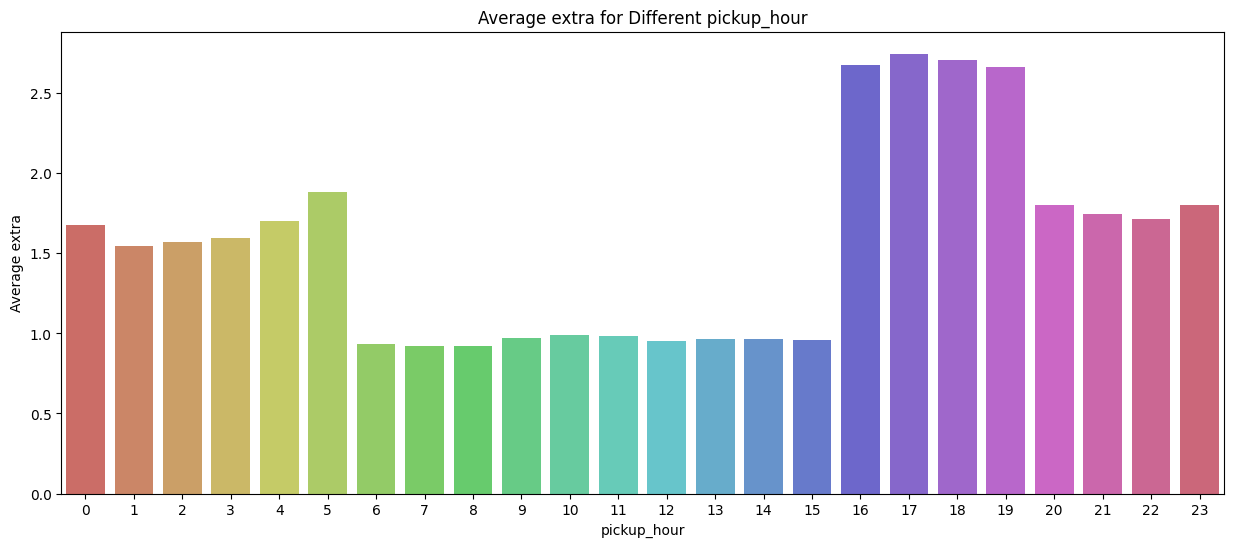

day_of_week
Thursday    1.82
Friday      1.82
Monday      1.81
Wednesday   1.81
Tuesday     1.79
Sunday      1.23
Saturday    1.11
Name: extra, dtype: float64


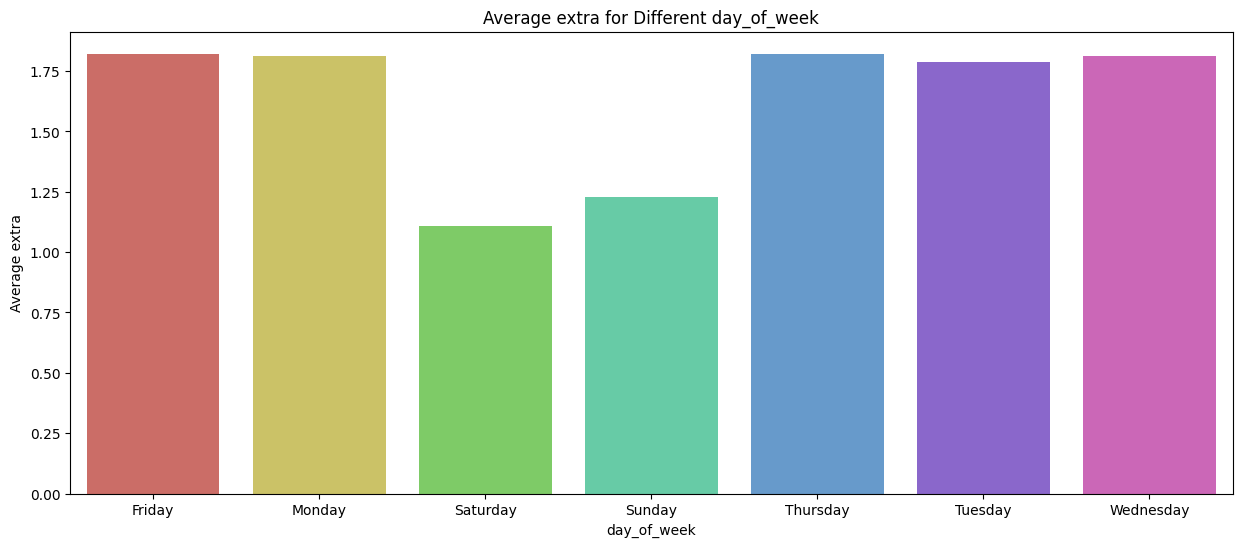

improvement_surcharge
1.00    274485
0.30       123
0.00       102
Name: count, dtype: int64


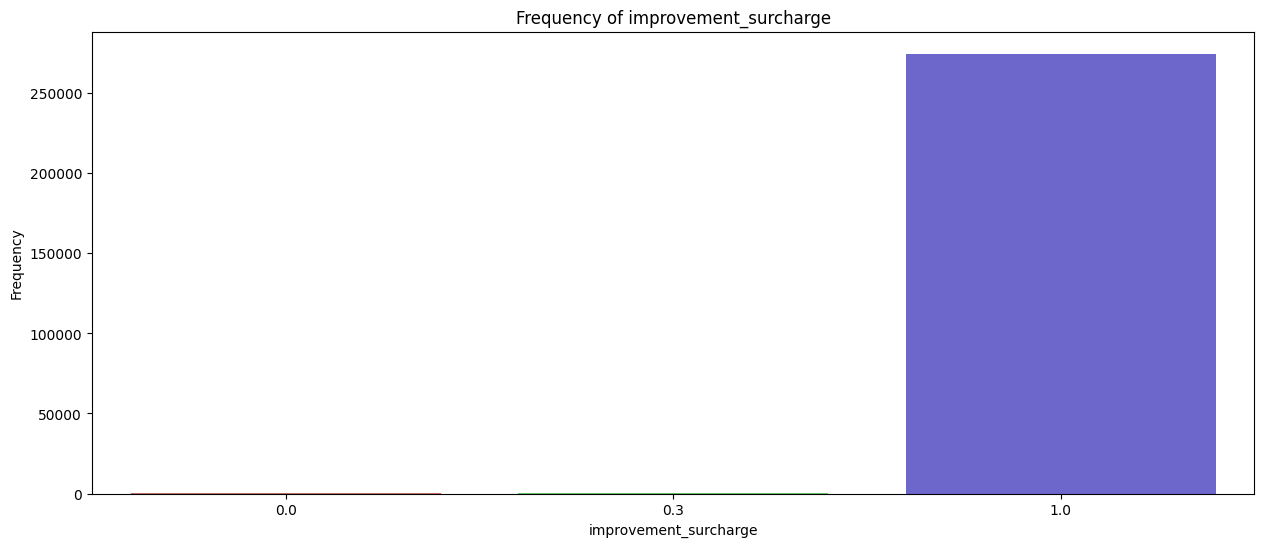

PULocationID
1     1.00
171   1.00
153   1.00
154   1.00
155   1.00
      ... 
220   0.95
14    0.94
136   0.90
20    0.75
240   0.50
Name: improvement_surcharge, Length: 241, dtype: float64


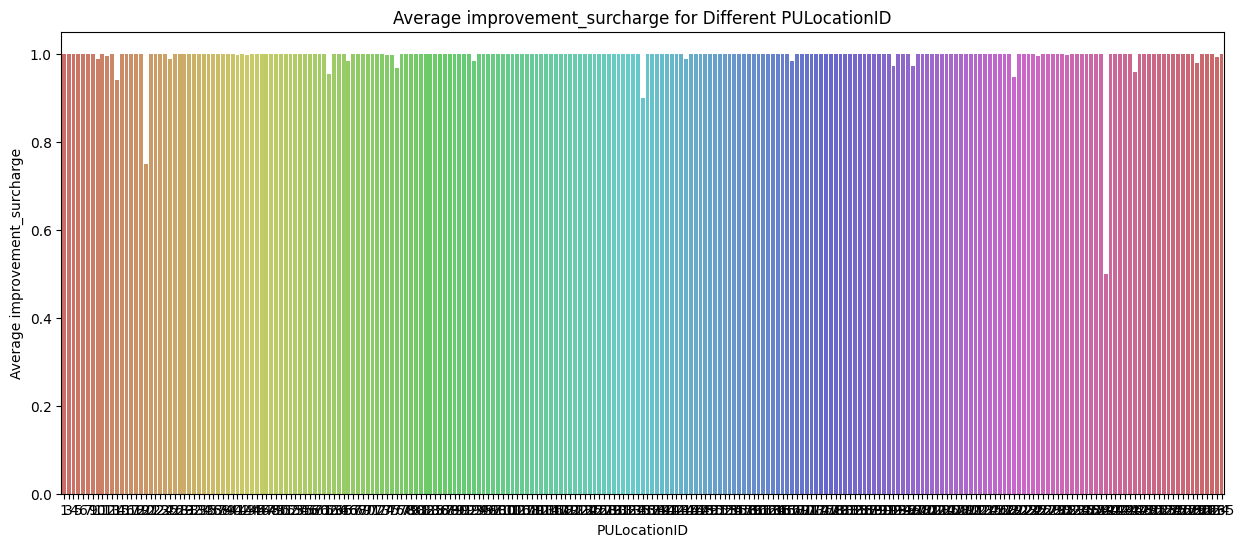

DOLocationID
1     1.00
174   1.00
155   1.00
156   1.00
157   1.00
      ... 
193   0.98
215   0.97
18    0.97
136   0.97
222   0.96
Name: improvement_surcharge, Length: 255, dtype: float64


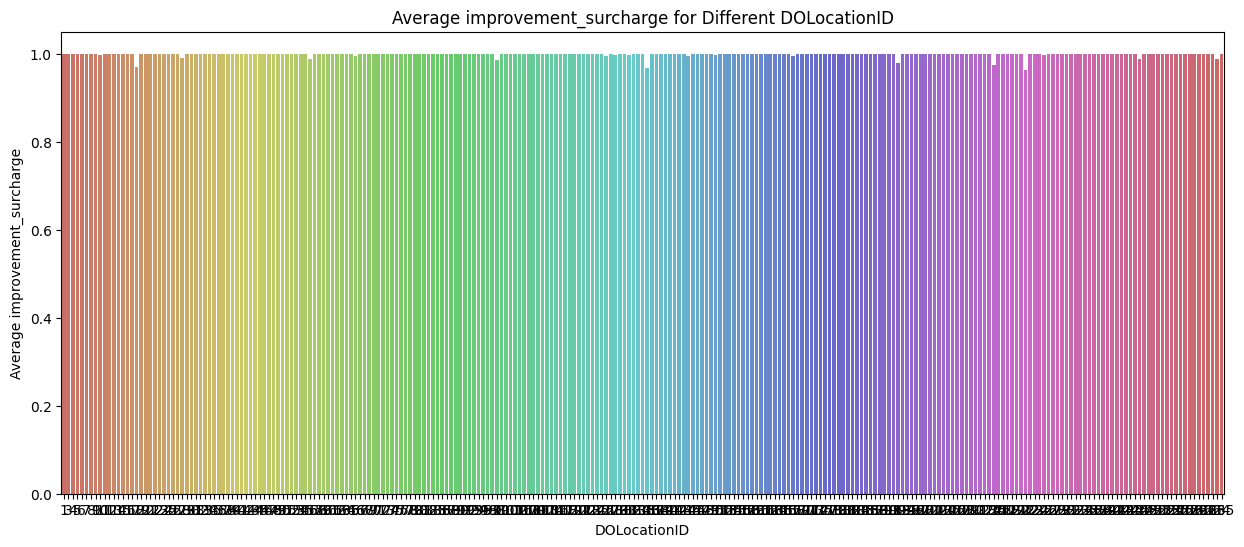

pickup_hour
2    1.00
21   1.00
22   1.00
1    1.00
19   1.00
20   1.00
23   1.00
7    1.00
13   1.00
14   1.00
3    1.00
0    1.00
18   1.00
17   1.00
16   1.00
10   1.00
12   1.00
9    1.00
15   1.00
5    1.00
8    1.00
11   1.00
6    1.00
4    1.00
Name: improvement_surcharge, dtype: float64


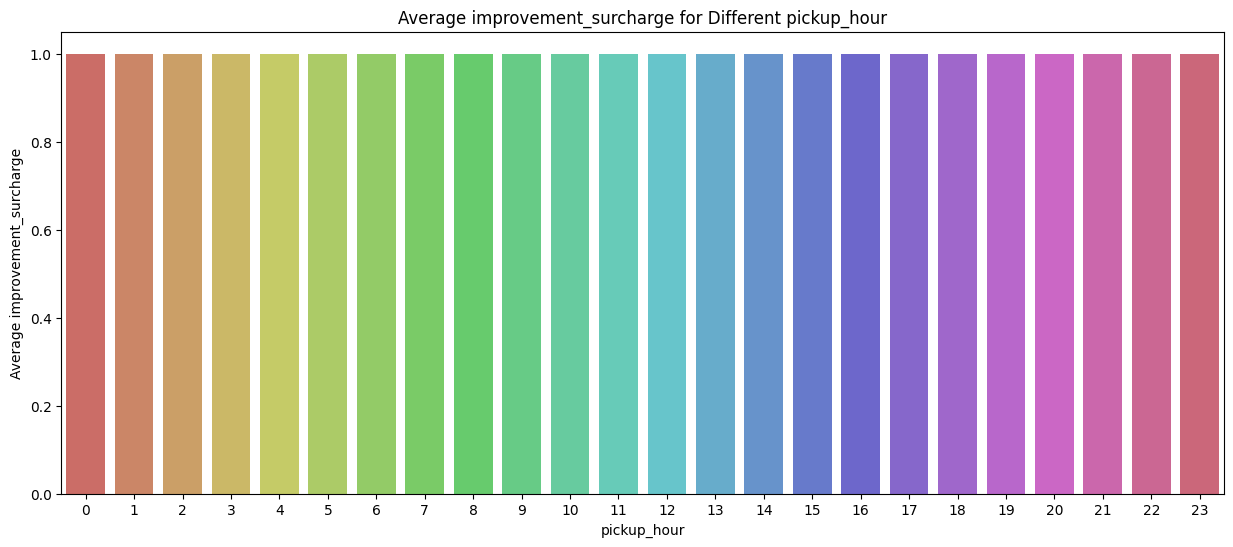

day_of_week
Saturday    1.00
Thursday    1.00
Sunday      1.00
Wednesday   1.00
Friday      1.00
Tuesday     1.00
Monday      1.00
Name: improvement_surcharge, dtype: float64


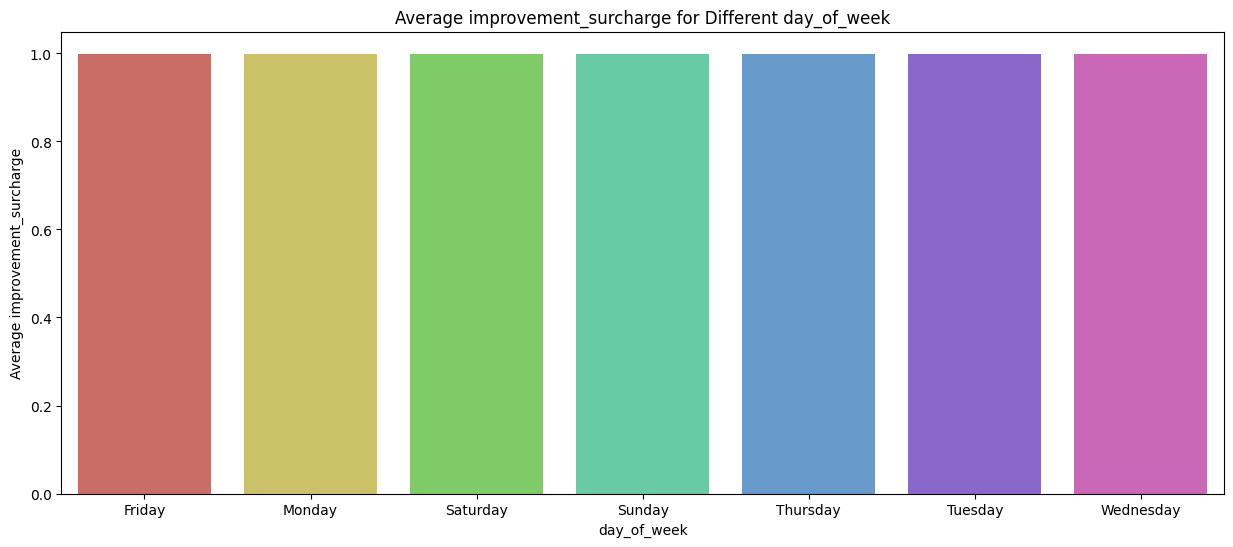

congestion_surcharge
2.50    253871
0.00     20839
Name: count, dtype: int64


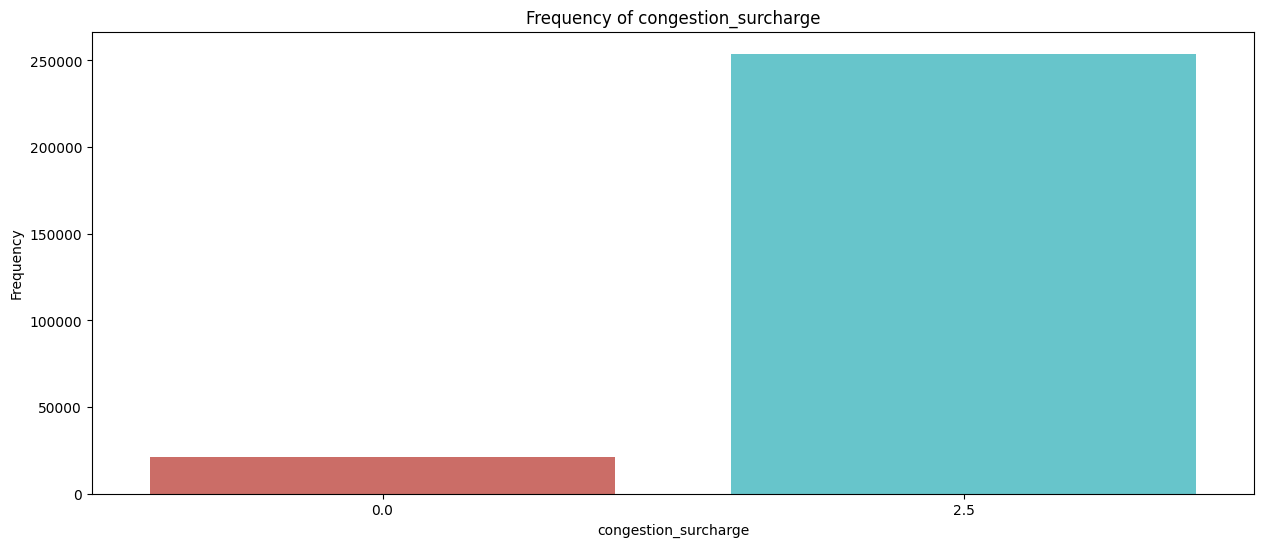

PULocationID
46    2.50
12    2.50
224   2.50
141   2.49
114   2.49
      ... 
121   0.00
122   0.00
123   0.00
124   0.00
136   0.00
Name: congestion_surcharge, Length: 241, dtype: float64


DOLocationID
59    2.50
12    2.50
99    2.50
111   2.50
156   2.50
      ... 
44    0.00
187   0.00
30    0.00
27    0.00
204   0.00
Name: congestion_surcharge, Length: 255, dtype: float64


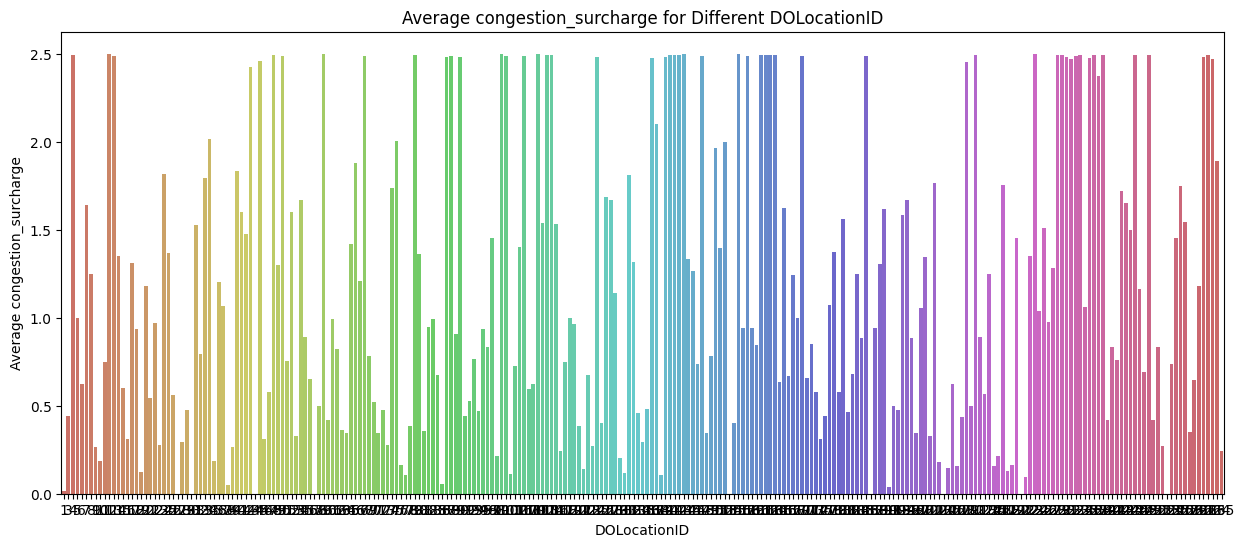

pickup_hour
2    2.38
3    2.35
18   2.35
19   2.33
12   2.33
17   2.33
21   2.33
20   2.33
11   2.32
1    2.32
14   2.32
10   2.31
13   2.31
16   2.31
22   2.31
15   2.31
9    2.31
8    2.30
0    2.26
7    2.26
23   2.24
4    2.21
6    2.12
5    2.00
Name: congestion_surcharge, dtype: float64


day_of_week
Saturday    2.34
Thursday    2.32
Wednesday   2.32
Tuesday     2.32
Friday      2.31
Sunday      2.28
Monday      2.27
Name: congestion_surcharge, dtype: float64


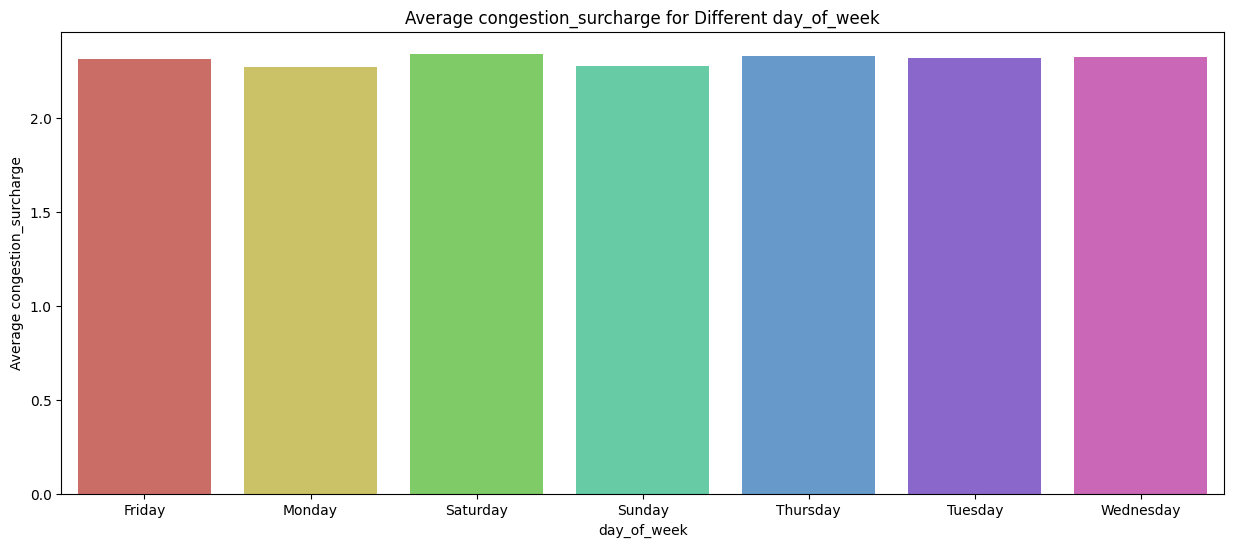

airport_fee
0.00    250719
1.75     17947
1.25      6044
Name: count, dtype: int64


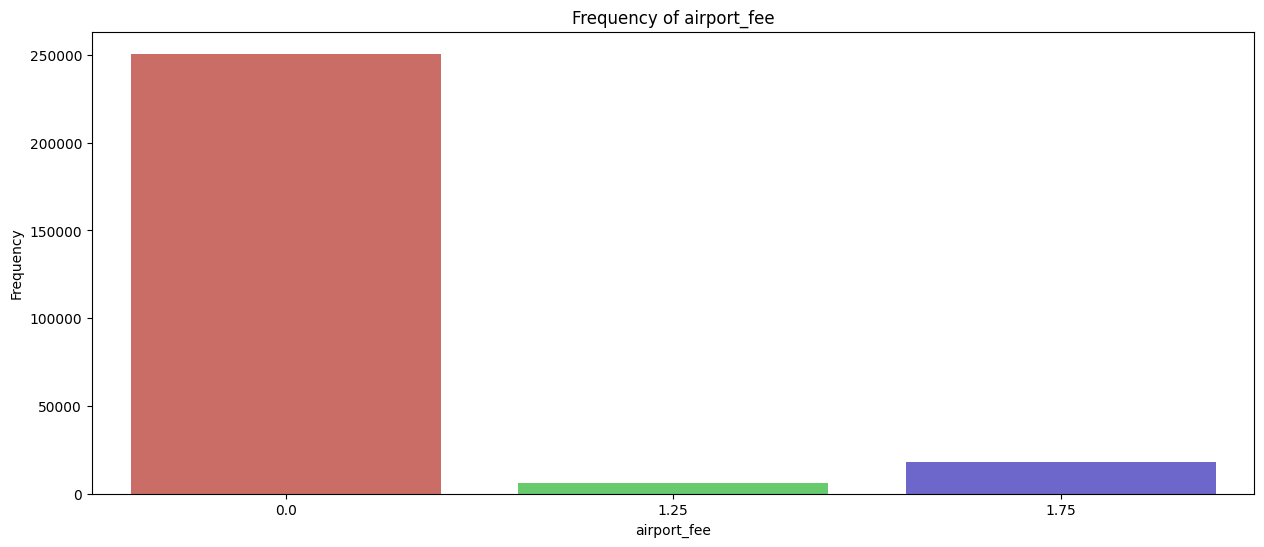

PULocationID
138   1.61
132   1.51
70    1.12
215   0.17
129   0.14
      ... 
96    0.00
98    0.00
101   0.00
102   0.00
265   0.00
Name: airport_fee, Length: 241, dtype: float64


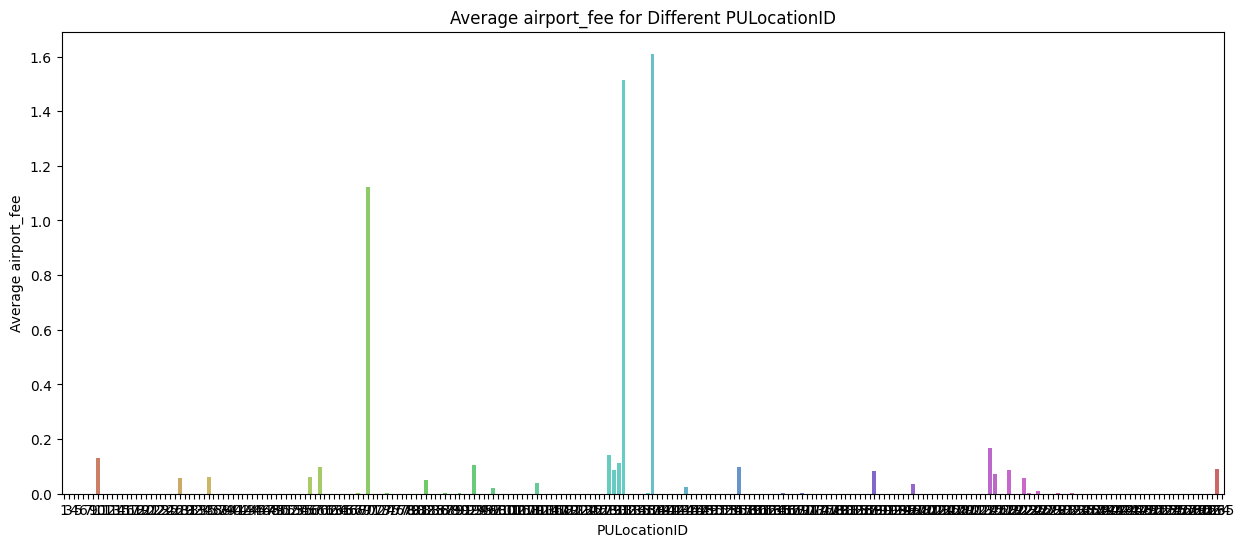

DOLocationID
156   1.75
57    1.75
253   1.65
204   1.50
154   1.45
      ... 
111   0.00
59    0.00
187   0.00
207   0.00
12    0.00
Name: airport_fee, Length: 255, dtype: float64


pickup_hour
23   0.22
5    0.18
6    0.18
0    0.18
22   0.17
15   0.16
21   0.16
20   0.16
14   0.15
16   0.15
19   0.14
17   0.14
13   0.14
10   0.13
11   0.12
7    0.12
12   0.12
18   0.12
9    0.12
8    0.10
1    0.09
4    0.07
2    0.05
3    0.05
Name: airport_fee, dtype: float64


day_of_week
Monday      0.19
Sunday      0.18
Tuesday     0.14
Friday      0.13
Wednesday   0.13
Thursday    0.13
Saturday    0.11
Name: airport_fee, dtype: float64


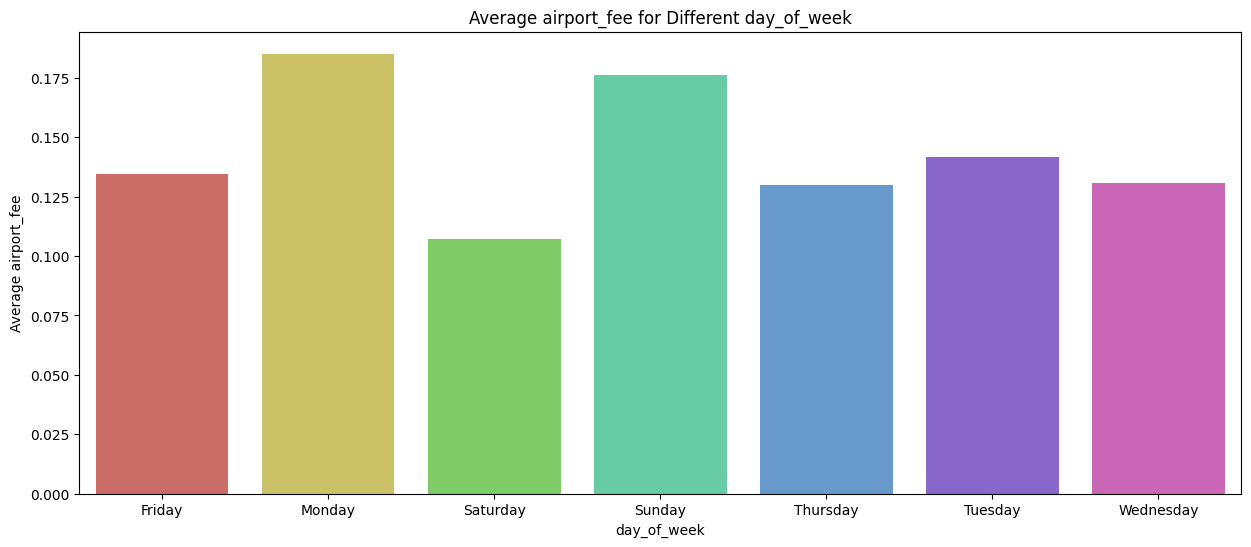

In [644]:
# How often is each surcharge applied?
#find the frequency of each surcharge
surcharge_columns = ['extra', 'improvement_surcharge','congestion_surcharge','airport_fee']
for col in surcharge_columns:
    surcharge_frequency = df[col].value_counts()
    print(surcharge_frequency)
    # Plot the frequency of each surcharge
    plt.figure(figsize=(15, 6))
    sns.barplot(x=surcharge_frequency.index, y=surcharge_frequency.values,palette='hls')
    plt.title('Frequency of '+col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    analysis_columns=['PULocationID','DOLocationID','pickup_hour','day_of_week']
    for ana_col in analysis_columns:
        extra_charge_pickup = df.groupby(ana_col)[col].mean()
        print(extra_charge_pickup.sort_values(ascending=False))
        plt.figure(figsize=(15, 6))
        sns.barplot(x=extra_charge_pickup.index, y=extra_charge_pickup.values,palette='hls')
        plt.title('Average '+col+' for Different '+ana_col)
        plt.xlabel(ana_col)
        plt.ylabel('Average '+col)
        plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- **Dynamic Driver Allocation:** Increase driver availability in zones and hours with the highest pickup counts (e.g., peak evening hours, busy pickup zones) while reducing supply during off‑peak periods.
- **Optimize Routing in Congested Areas:** Identify routes with lower average speeds and consider real-time traffic data to reroute drivers and reduce trip durations.
- **Enhanced Dispatch Algorithm:** Incorporate historical demand patterns to pre-position drivers in high-demand zones and on busy corridors.
- **Resource Balancing:** Adjust scheduling based on day-type patterns (weekday vs. weekend) and consider dedicated drivers for high-traffic zones.
- **Demand Surge Management:** Implement dynamic pricing or incentive programs during periods of surging demand to balance supply and demand effectively.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Pre-position cabs in consistently high-demand zones (e.g., major transit and commercial hubs) identified from peak pickup and revenue data.
- Increase cab availability in these zones during peak weekday hours and high-revenue months.
- Rebalance fleet allocation during off-peak hours and weekends to avoid oversupply in low-demand areas.
- Use historical trip trends to forecast demand shifts and adjust positions dynamically.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


1. Time-Based Pricing:
    - Implement surge pricing during peak hours (5 PM - 6 PM)
    - Higher rates during weekday rush hours (8 AM - 10 AM, 4 PM - 7 PM)
    - Reduced rates during off-peak hours (2 AM - 5 AM)
    - Premium pricing for weekend night hours (10 PM - 2 AM)

2. Distance-Based Pricing:
    - Short trips (0-2 miles): Base rate + higher per-mile rate
    - Medium trips (2-5 miles): Base rate + standard per-mile rate
    - Long trips (5+ miles): Base rate + discounted per-mile rate
    - Current avg fare per mile analysis shows optimal rates:
      * Short trips: $13-15/mile
      * Medium trips: $5-7/mile
      * Long trips: $3-5/mile

3. Zone-Based Pricing:
    - Premium rates for high-demand zones (e.g., zones 132, 237, 161)
    - Dynamic pricing in zones with high pickup/dropoff ratios
    - Special rates for airport routes
    - Competitive rates in zones with multiple transportation options

4. Demand-Based Surcharges:
    - Maintain current surcharge structure:
      * Peak hour surcharge
      * Night surcharge
      * Airport fee
    - Add new surcharges:
      * Special event surcharge
      * High-demand zone surcharge
      * Weather-based surcharge

5. Loyalty Program:
    - Volume discounts for frequent riders
    - Off-peak hour discounts
    - Special rates for corporate accounts
    - Rewards for longer trips

6. Competitive Monitoring:
    - Regular analysis of competitor pricing
    - Flexible pricing adjustments based on market conditions
    - Maintain price advantage in key zones
    - Monitor customer feedback and satisfaction